<a href="https://colab.research.google.com/github/campeone-pixel/soccer_database/blob/master/Poses_Cannoni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<center>
<img src="https://media.ambito.com/p/d92912540da60cadcb52104b87cfdd0f/adjuntos/239/imagenes/040/434/0040434979/messi-copajpg.jpg" height="300" />
</center>



<h1 ><font color='#2ca18c'><strong>MODELO PREDICTIVO DE LAS MEJORES LIGAS DE FUTBOL</strong></font></h1>

---



# Table of contents
1. [Introduccion](#INTRODUCCION)
  - [Objetivos](#OBJETIVOS)
  - [Contexto comercial](#CONTEXTO)
2. [Datos obtenidos](#DATOS)


4. [Limpieza del dataset](#Limpieza)
5. [Analisis exploratorio](#Analisis)
6. [Ingenieria de datos](#Ingenieria)
7. [Modelado](#Modelado)
8. [Utilizacion API](#API)
9. [Conclusiones](#Conclusiones)


---





## <font color='#2ca18c'>1 - INTRODUCCION</font> <a name="introduction"></a>

> La ciencia de datos se está utilizando con una mayor frecuencia en gran cantidad de rubros. El fútbol no es una excepción y estos últimos años ha tenido un crecimiento exponencial, ya que es de una gran utilidad para que los cuerpos técnicos y médicos saquen conclusiones. 
Es muy común ver estadísticas en el entretiempo, final del partido e incluso en medio del mismo, en donde se puede analizar los diferentes rendimientos de los futbolistas.






### <font color='#2ca18c'>OBJETIVOS</font><a name="Objetivos"></a>



 > El objetivo del trabajo es poder predecir resultados de partidos, con el fin de poder ayudar a los cuerpos técnicos de los clubes a obtener más información a la hora de plantear los partidos.
Algunas de las preguntas que nos queremos responder son:


*   ¿El equipo local, gana mucho más que el visitante?
*   ¿A medida que avanza el tiempo, es más fácil o más difícil hacer goles? Teniendo en cuenta que se estudia mucho más al rival, su manera de jugar, y se analizan datos estadísticos.


*   ¿Todas las ligas disputan la misma cantidad de partidos, es decir los jugadores sufren igual degaste en todas las ligas?
*   ¿Se mantienen constante los partidos disputados en las ligas durante todo el año?


*   ¿Que liga es la más atractiva para ver fútbol, o sea en cual hay más goles por partido?
*   ¿Los jugadores con más goles, son los más reconocidos mundialmente?



### <font color='#2ca18c'>CONTEXTO COMERCIAL</font> <a name="Contexto"></a>

> La estadística se está utilizando cada vez más en el ámbito del fútbol. El cuerpo técnico corrobora, en cada partido, los rendimientos que han tenido sus futbolistas particularmente y a los mismos en su conjunto, es decir al equipo. Esto les da una idea de qué aspectos debe corregir para los siguientes compromisos para obtener mejores versiones. 
Con este trabajo se busca que los cuerpos técnicos tengan una nueva herramienta a la hora de planificar sus partidos, con el fin de obtener resultados positivos. Así tendrán una mayor chance de lograr los objetivos deportivos que se propusieron. 
#### <font color='#2ca18c'>PROBLEMA COMERCIAL</font> <a name="introduction"></a>

> Los stakeholders serían los cuerpos técnicos de los distintos clubes. Lo que se les quisiera mostrar serían predicciones de resultados de los partidos para que ellos tomen medidas en base a los mismos y así beneficiar al equipo.
#### <font color='#2ca18c'>CONTEXTO ANALITICO</font> <a name="introduction"></a>

> Una casa de apuesta nos contrató debido a que las ganancias que solían tener se están reduciendo con el paso del tiempo. Necesitan volver a la rentabilidad a la cual estaban acostumbrados para mantener su estructura.
Para poder predecir los resultados de los partidos se utilizará un modelo de aprendizaje supervisado, ya que con los datos etiquetados con los que contamos se podrá predecir cómo finalizará. Dentro del mismo, estaría dentro de la categoría de clasificación, ya que el modelo permitirá determinar si el equipo gana, pierde o empata.
Las variables a tener en cuenta para el mismo será:


    * xGoals promedio (Goles esperados)
    * xGoals de los últimos 3 partidos
    * Localía
    * Liga
    * Goles convertidos en el torneo

> En el proximo video podemos entender mejor que representa la estadistica llamada xGoals








In [207]:
# #@title
# %%html
# <iframe width="560" height="315" src="https://www.youtube.com/embed/5flVB9ef0uM" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

from IPython.display import IFrame
IFrame('https://www.youtube.com/embed/5flVB9ef0uM', width=560, height=315,frameborder="0" ,allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture")

---

## <font color='#2ca18c'>2 - DATOS OBTENIDOS</font> <a name="Datos"></a>
El dataset escogido es relacionado al fútbol. Tiene una muy completa información desde el 2014 hasta el 2020.
El mismo se encuentra dividido en 7 partes.
En el dataset "appearences" se hallan estadísticas de cada futbolista en cada aparición en un partido. Tales como goles, disparos, asistencias, posición, tarjeta amarilla, tarjeta roja, cuánto tiempo jugó, si lo sustituyeron.
El dataset "games" refiere a estadísticas relacionadas con los partidos disputados en dicho rango de tiempo. En el mismo se encuentra, como lo más sobresaliente, la temporada, el día y la hora en el que se disputó el encuentro, qué equipos lo hicieron, los goles convertidos por parte de cada uno.
El dataset "leagues" refiere a las 5 ligas más importantes del mundo, de las cuales se obtuvieron la información. Estas son la española, la inglesa, la italiana, la alemana y la francesa.
El dataset "players" es acerca de todos los jugadores que disputaron partidos en dicho periodo de tiempo y en dichas ligas.
El dataset "shots" es sobre los disparos efectuados por los jugadores en los partidos, en qué minuto de juego, en qué situación de juego, con qué parte del cuerpo y el resultado de ese remate, entre otras.
El dataset "teams" se refiere a los equipos que disputaron los partidos en las ligas y periodo mencionados anteriormente.
El dataset "teamstats" es acerca de las estadísticas de cada equipo en cada partido, tales como el año que se disputó, el día y la hora, en qué condición lo hizo, la cantidad de goles que realizó y le concedieron, los disparos, las faltas, los corners, las tarjetas amarillas y rojas.













## <font color='#2ca18c'>3 - LIMPIEZA DEL DATASET</font> <a name="Limpieza"></a>

> Importamos los paquetes necesarios para realizar la limpieza de los datasets y tambien leemos los datasets con el link de GITHUB

In [208]:


import pandas as pd
import numpy as np 


# from pandas_profiling import ProfileReport


#df_games = pd.read_csv("df_game_new.csv")
#df_teams = pd.read_csv("df_teams_new.csv")
#df_appearances = pd.read_csv("df_appearances_new.csv")
#df_players = pd.read_csv("df_players_new.csv")

df_games = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/df_game_new.csv")
df_teams = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/df_teams_new.csv")
df_appearances = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/df_appearances_new.csv")
df_players = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/df_players_new.csv")

> Eliminamos las columnas repetidas y las que no necesitamos. Luego nos quedamos con las columnas mas importantes

In [209]:
df_appearances=df_appearances.rename(columns={'playerID_df2':'player_id',"player_club_id":'club_id'})
df_appearances=df_appearances.drop(columns=['name','pretty_name'], axis=1)
df_appearances=df_appearances[['gameID', 'leagueID', 'playerID','appearance_id', 'club_id','player_id',  'shots', 'xGoals',
       'xGoalsChain', 'xGoalsBuildup', 'assists', 'keyPasses', 'xAssists',
       'position', 'positionOrder', 'time',
        'date',
       ]]

df_teams.rename(columns={'name_x':'name'},inplace=True)
df_teams.drop(columns=['name_y','url',"coach_name","foreigners_percentage","foreigners_number","squad_size","stadium_name","stadium_seats","national_team_players","net_transfer_record"],inplace=True)

df_players.drop(columns=["contract_expiration_date","agent_name","image_url"],inplace=True)
df_players.drop(columns='playerID_df2',inplace=True)

df_games.drop(columns=['BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH',
       'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD',
       'PSCA','match_name', 'homeProbability', 'drawProbability',
       'awayProbability', 'homeGoalsHalfTime', 'awayGoalsHalfTime', 'B365H',
       'B365D', 'B365A', 'leagueID','game_id', 'date_y','redCards_home','yellowCards_home','yellowCards_away', 'redCards_away', 'fouls_home', 'fouls_away'],inplace=True)
df_games.rename(columns={'df_games':'date'},inplace=True)
df_games.rename(columns={'date_y':'date'})

,gameID,season,date_x,homeTeamID,awayTeamID,homeGoals,awayGoals,xGoals_home,shots_home,shotsOnTarget_home,...,shotsOnTarget_away,deep_away,ppda_away,corners_away,result_away,liga,home_name,away_name,home_club_id,away_club_id
0,81.0,2015.0,2015-08-08,89.0,82.0,1.0,0.0,0.627539,9.0,1.0,...,4.0,10.0,8.2188,2.0,L,Premier League,Manchester United,Tottenham,985,148
1,82.0,2015.0,2015-08-08,73.0,71.0,0.0,1.0,0.876106,11.0,2.0,...,3.0,2.0,11.8462,3.0,W,Premier League,Bournemouth,Aston Villa,989,405
2,83.0,2015.0,2015-08-08,72.0,90.0,2.0,2.0,0.604226,10.0,5.0,...,5.0,4.0,17.1579,2.0,D,Premier League,Everton,Watford,29,1010
3,84.0,2015.0,2015-08-08,75.0,77.0,4.0,2.0,2.568030,19.0,8.0,...,5.0,6.0,9.5556,3.0,L,Premier League,Leicester,Sunderland,1003,289
4,85.0,2015.0,2015-08-08,79.0,78.0,1.0,3.0,1.130760,17.0,6.0,...,7.0,10.0,10.6250,4.0,W,Premier League,Norwich,Crystal Palace,1123,873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12674,16131.0,2020.0,2021-05-23,168.0,166.0,1.0,2.0,1.411190,15.0,5.0,...,5.0,3.0,8.3529,5.0,W,Ligue 1,Nantes,Montpellier,995,969
12675,16132.0,2020.0,2021-05-23,177.0,176.0,1.0,2.0,1.198190,10.0,3.0,...,5.0,4.0,27.0000,2.0,W,Ligue 1,Reims,Bordeaux,1421,40
12676,16133.0,2020.0,2021-05-23,163.0,235.0,2.0,0.0,1.332690,12.0,6.0,...,2.0,0.0,39.7273,3.0,L,Ligue 1,Rennes,Nimes,273,1160
12677,16134.0,2020.0,2021-05-23,175.0,181.0,0.0,1.0,1.460500,19.0,5.0,...,2.0,3.0,14.7200,3.0,W,Ligue 1,Saint-Etienne,Dijon,618,2969


> llenamos las celdas con valores nulos con las medianas de cada columna

In [210]:
df_teams = df_teams.fillna(df_teams[["total_market_value", "average_age"]].median())

df_players = df_players.fillna(
    df_players[["market_value_in_gbp", "highest_market_value_in_gbp"]].median()
)

df_players["sub_position"] = df_players["sub_position"].fillna(df_players["sub_position"].mode()[0])
df_players["foot"] = df_players["foot"].fillna(df_players["foot"].mode()[0])
df_players["country_of_birth"] = df_players["country_of_birth"].fillna(df_players["country_of_birth"].mode()[0])
df_players["date_of_birth"].fillna(value=pd.to_datetime("1/1/1985"), inplace=True)


> Revisamos los datasets en busqueda de valores nulos

<Axes: >

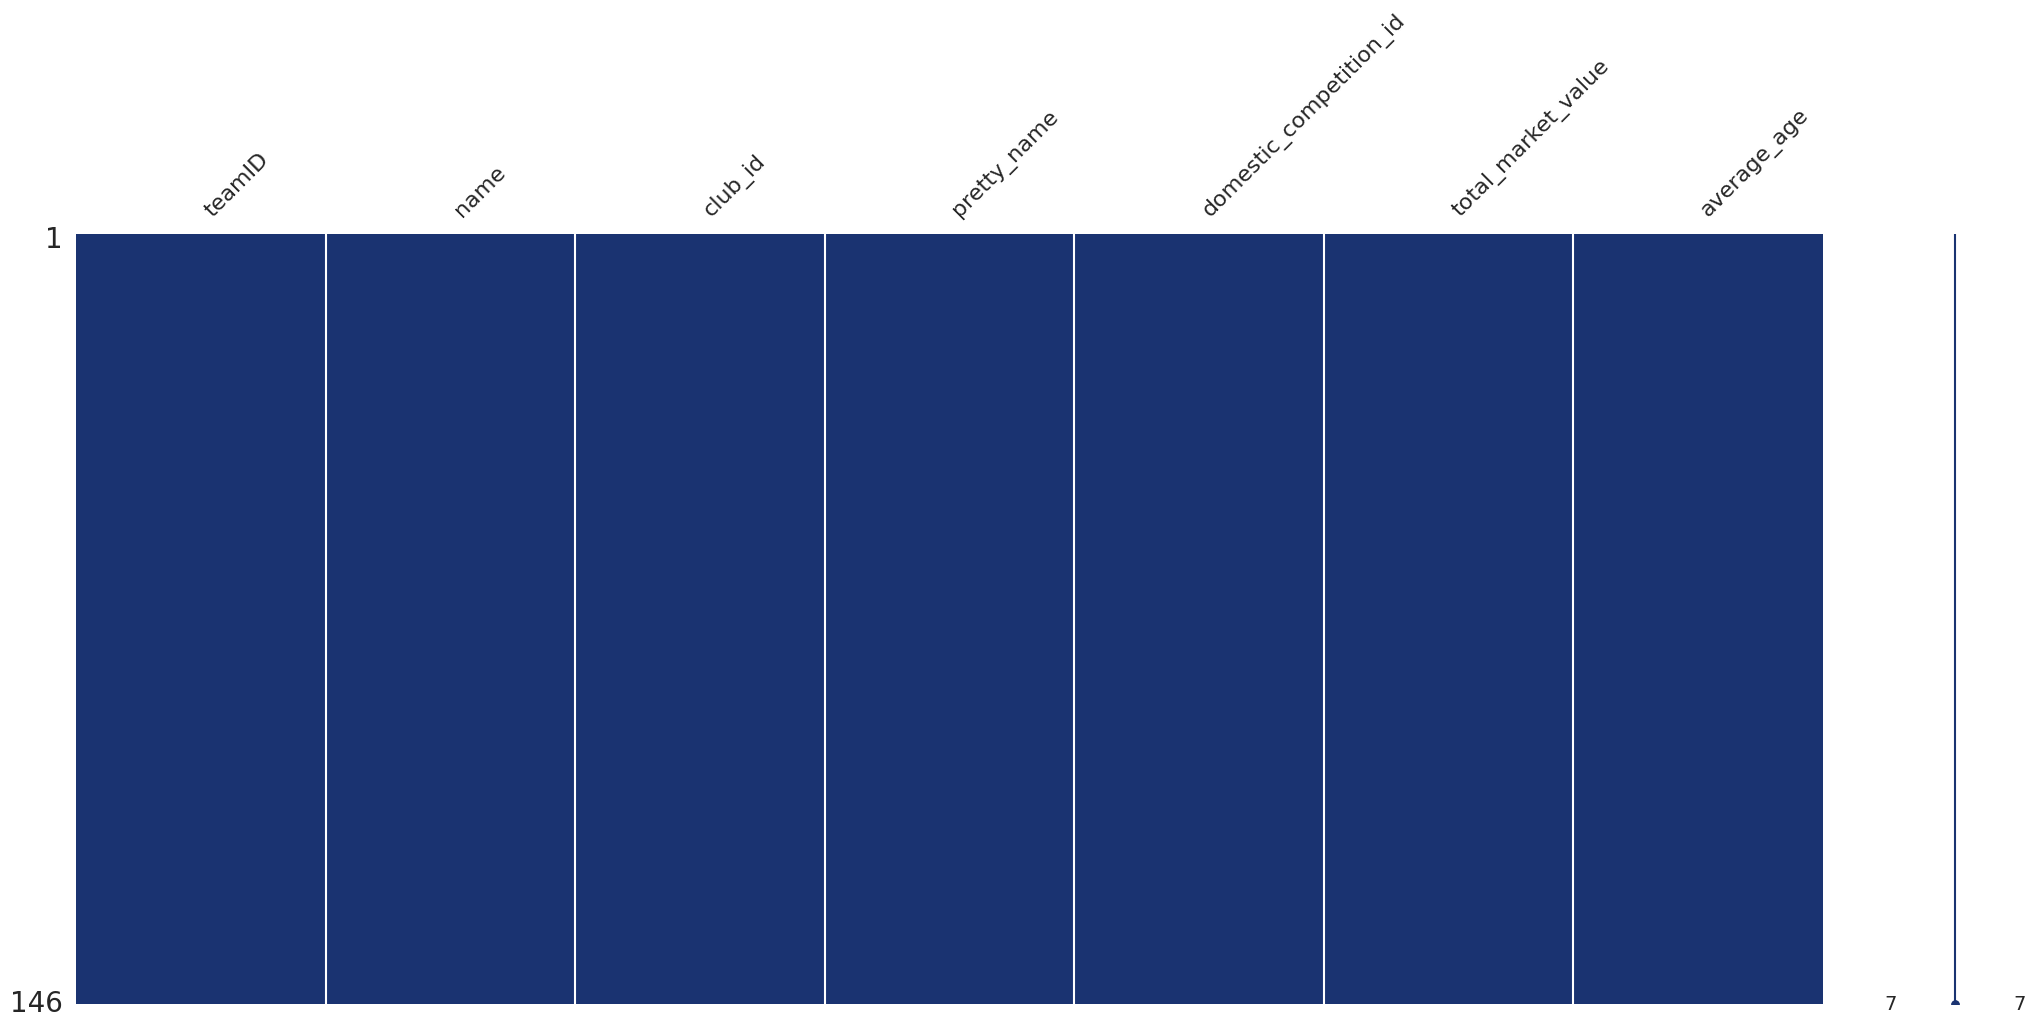

In [211]:
import missingno as msno

msno.matrix(df_teams,color=(26 / 255, 51 / 255, 113 / 255))

<Axes: >

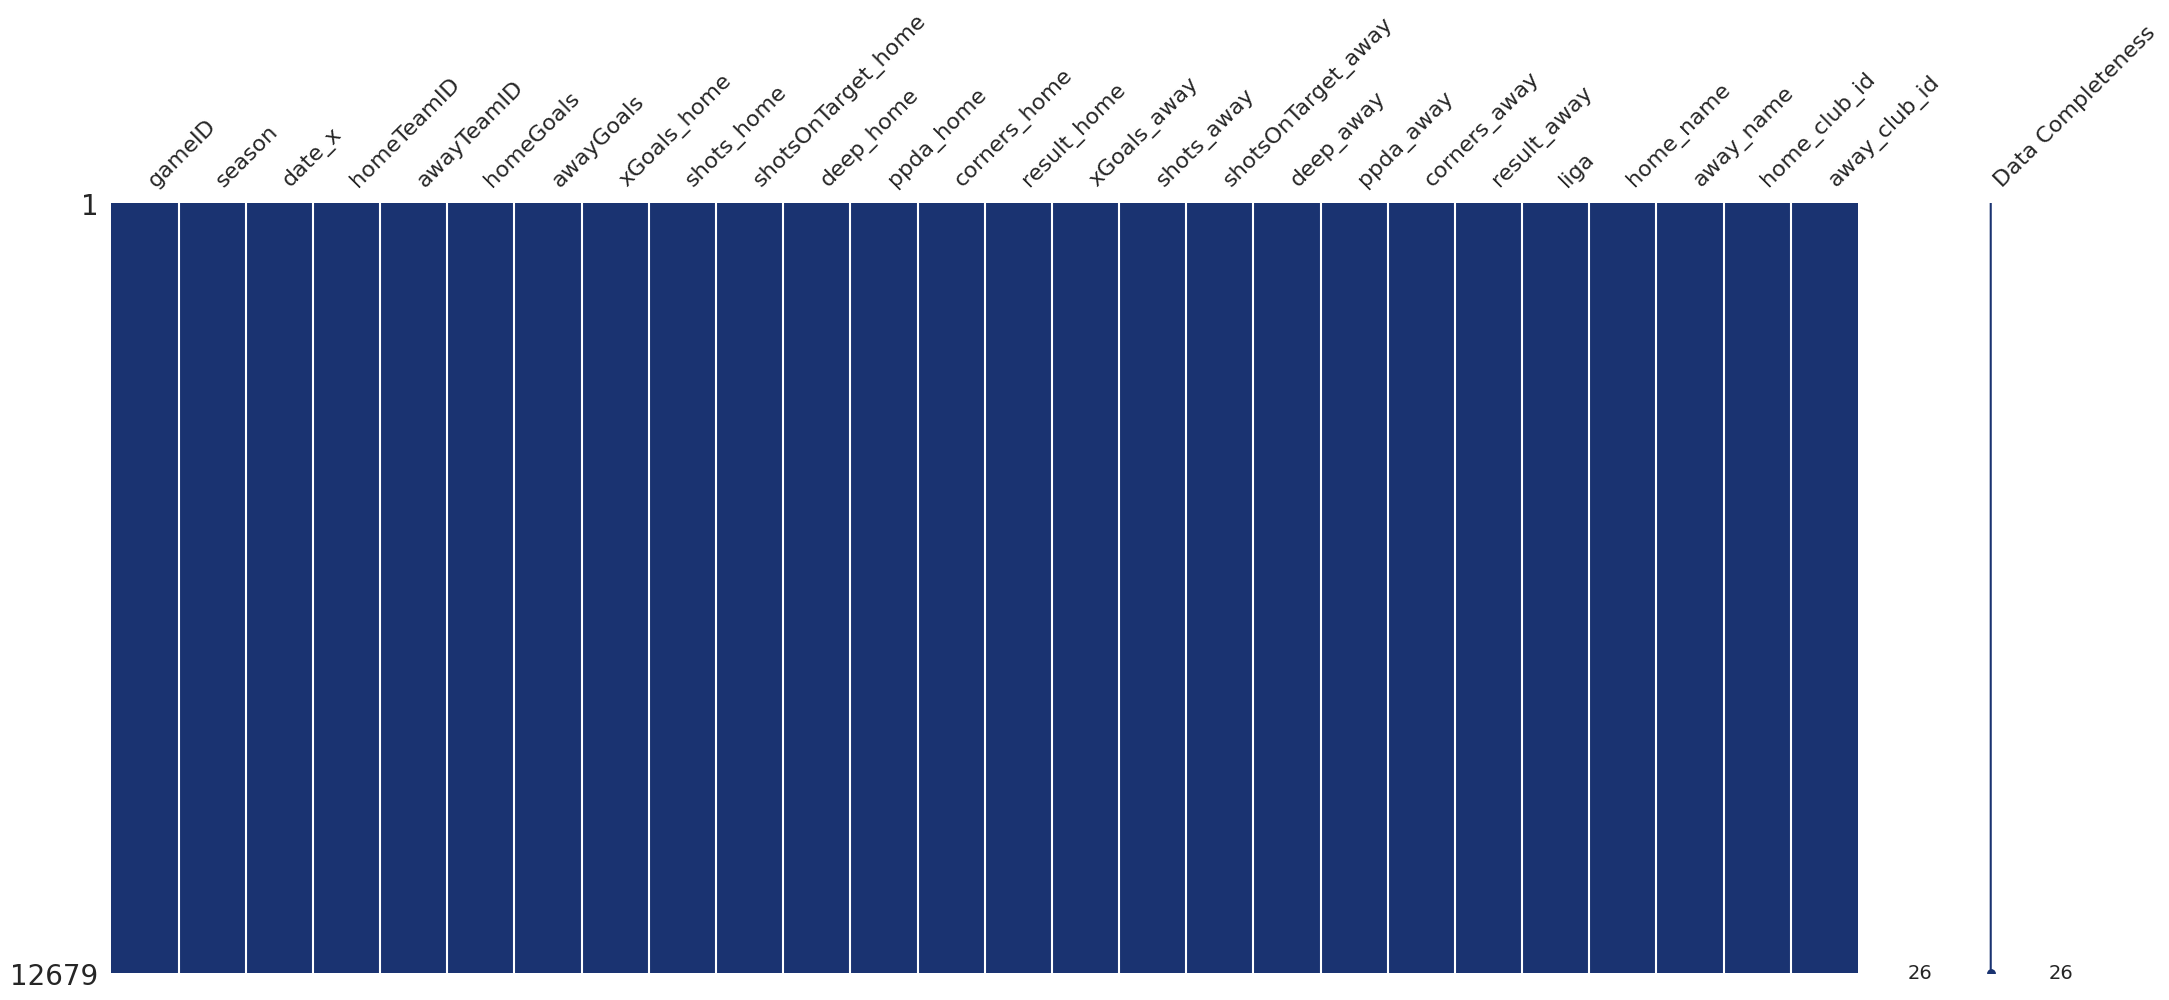

In [212]:
msno.matrix(df_games,color=(26 / 255, 51 / 255, 113 / 255),labels=True)



In [213]:
# profile_df_games = ProfileReport(df_games)
# profile_df_games

<Axes: >

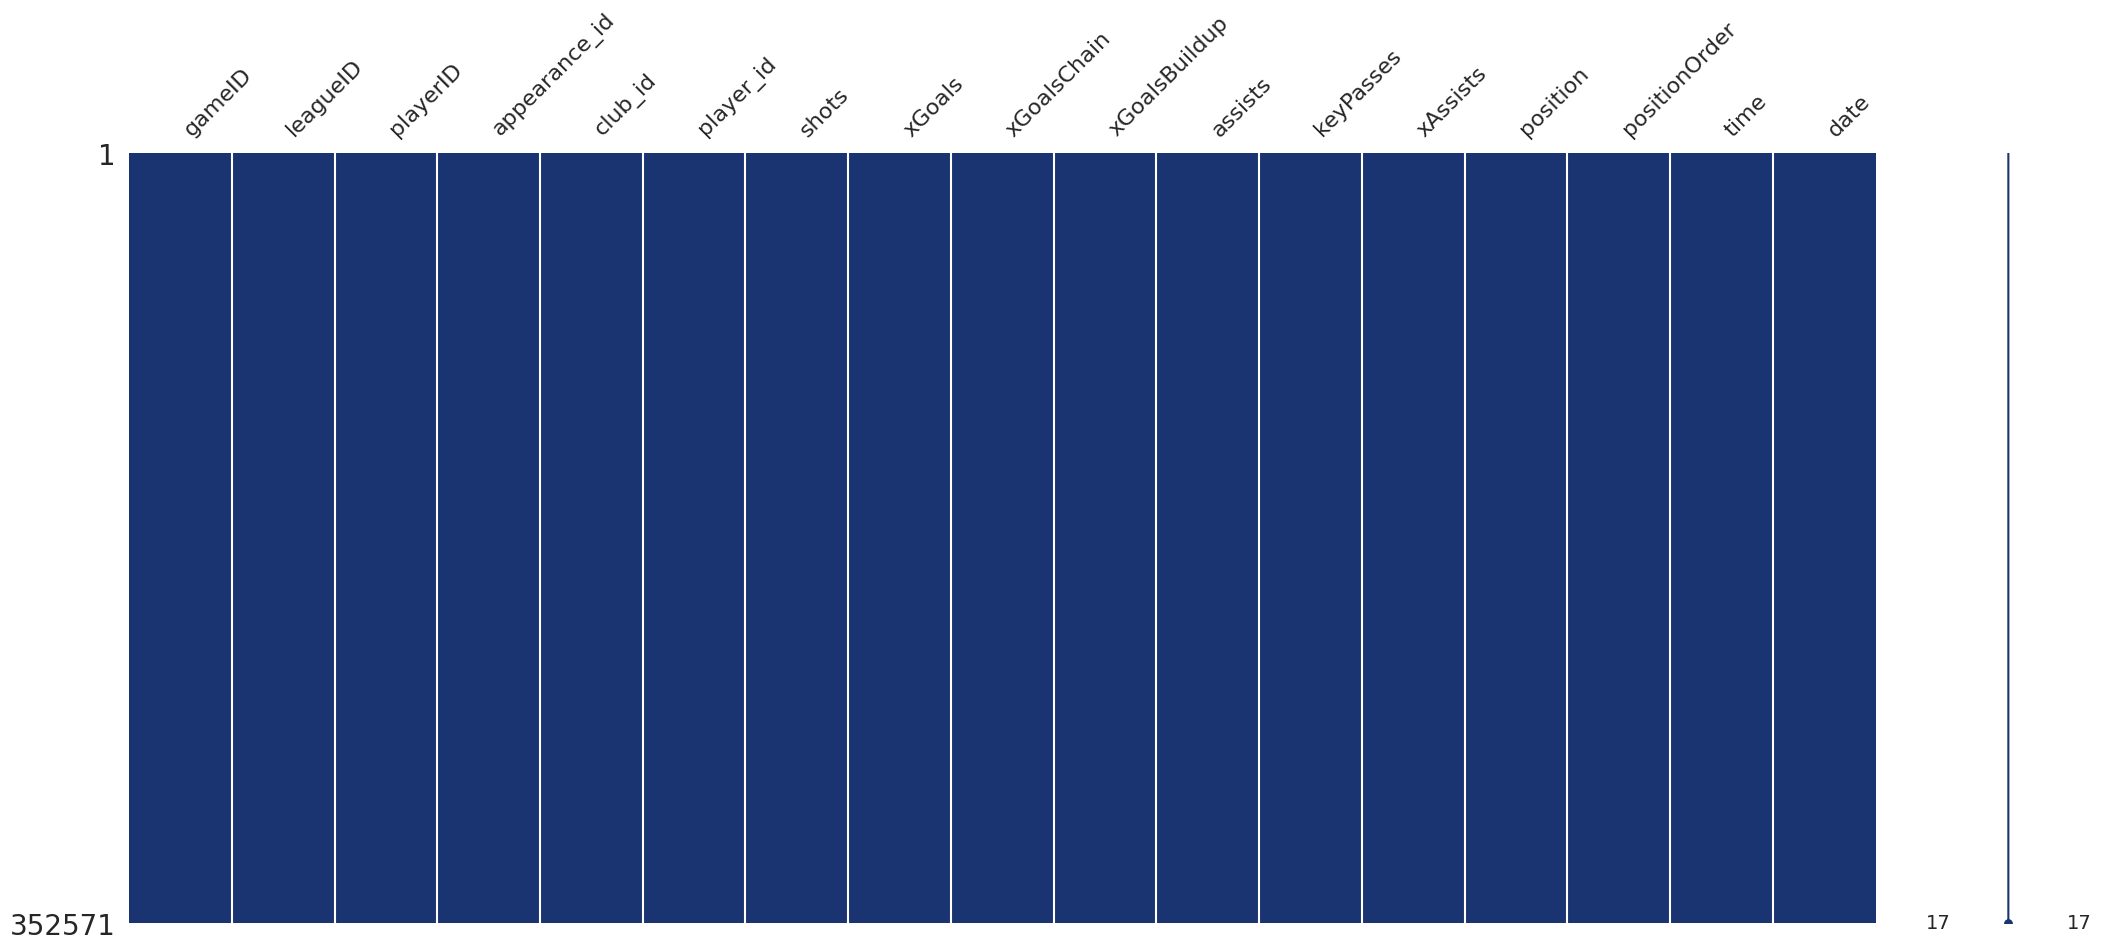

In [214]:
msno.matrix(df_appearances,color=(26 / 255, 51 / 255, 113 / 255))

In [215]:
# profile_df_appearances = ProfileReport(df_appearances)
# profile_df_appearances

<Axes: >

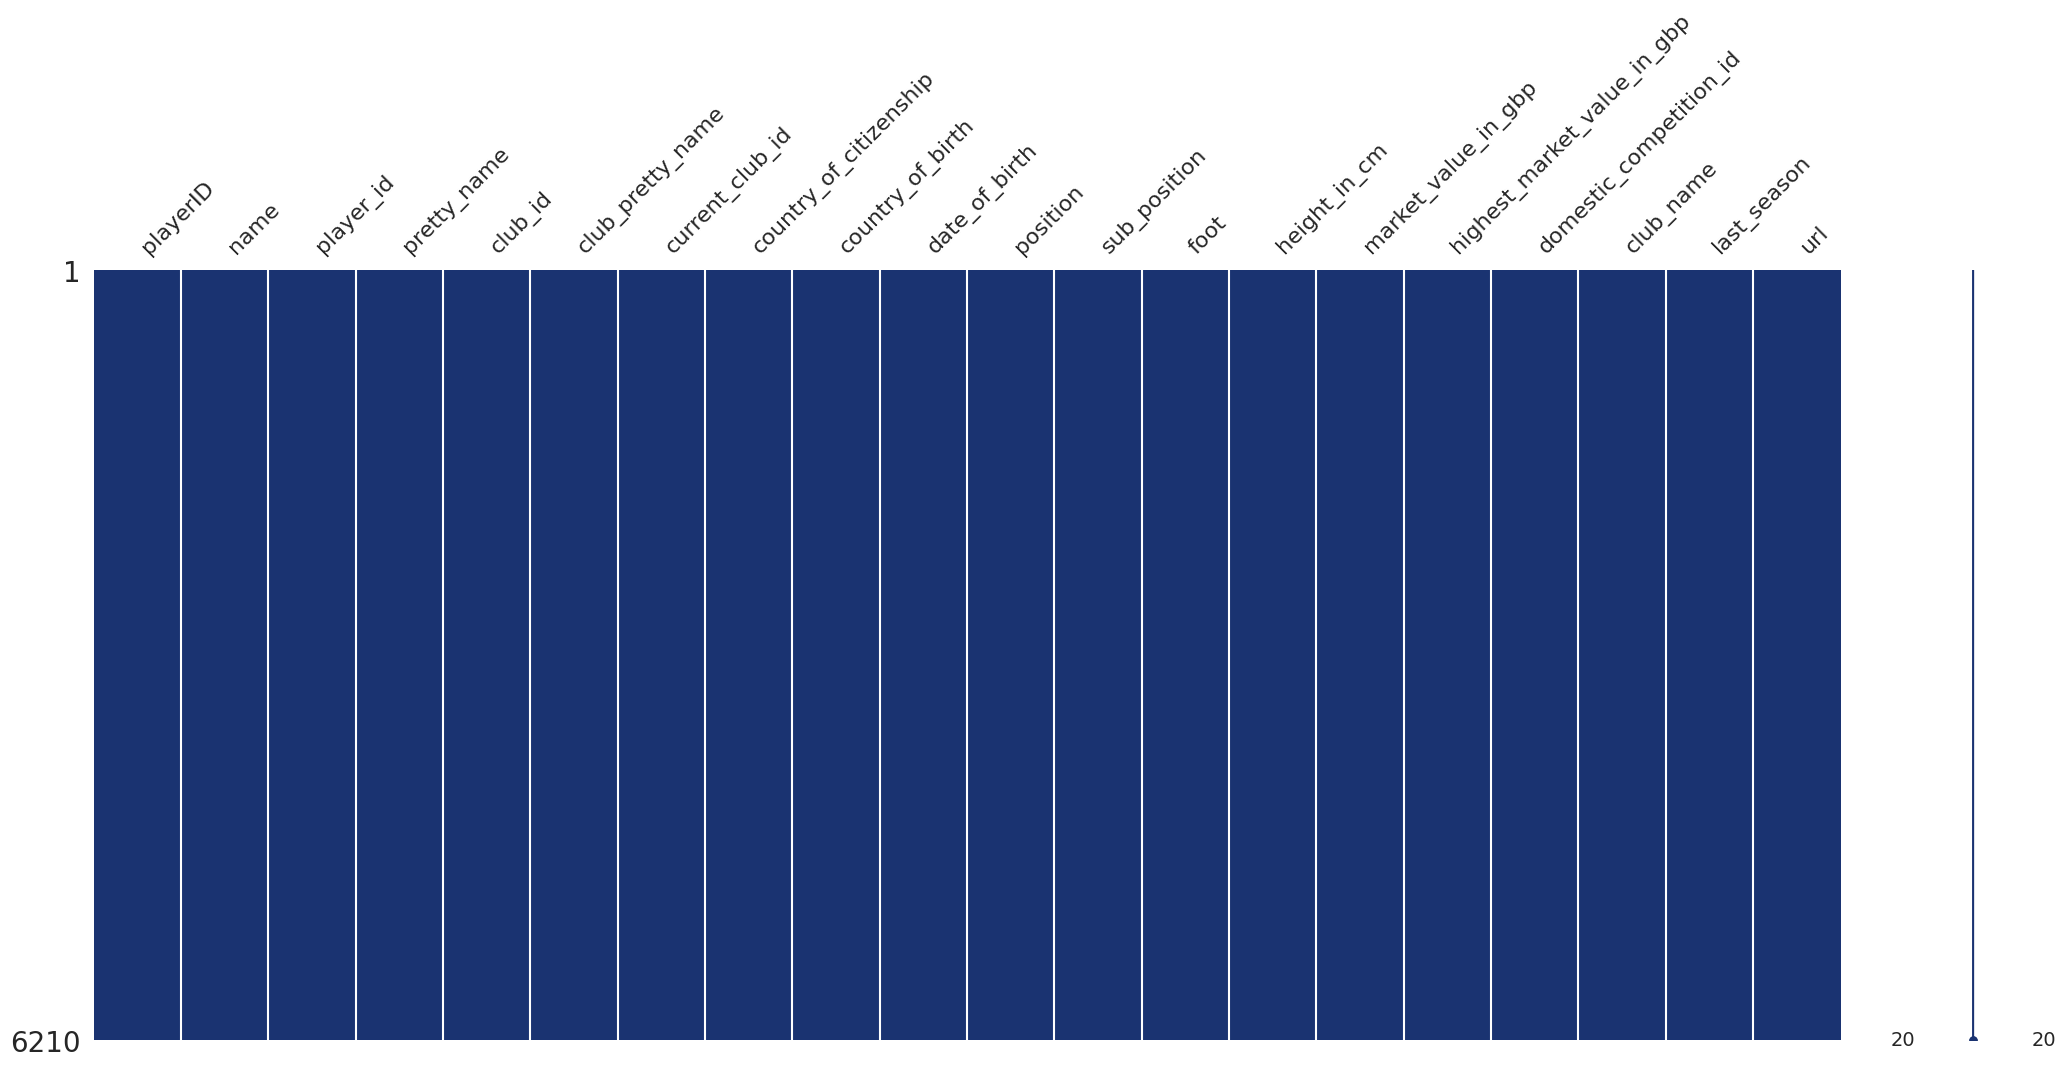

In [216]:
msno.matrix(df_players,color=(26 / 255, 51 / 255, 113 / 255))

#### MERGE DE DATOS DE DF_APPEARANCES CON DF_GAMES

> Con la union de los datos de df_appearances vamos a tener estadisticas segun las posiciones de los jugadores por cada equipo. Creamos una columna donde agrupamos las estadisticas de las posiciones individuales en tres posiciones generales como la defensa, el medio y delanteros, y de cada uno de estos tenemos la suma de los xGoals, xAssits, xGoalsChains y demas estadisticas. De esta forma podemos entender que participacion tiene cada zona y que tan importantes son para que el equipo gane.

In [217]:

def positions(elemento):
  defensores = ['GK','DR', 'DL', 'DC']
  mediocampistas = ['MC','ML','MR','DMR','DML','DMC']
  delanteros = ['FWR', 'FW', 'FWL','AMR', 'AMC','AML']
  if elemento in defensores:
    return "def"
  elif elemento in mediocampistas:
    return "med"
  else:
    return "del"

df_appearances['position_agrup']=df_appearances['position'].apply(lambda x: positions(x))

df_games_only_gameID_and_teams_home = df_games[['gameID','home_club_id']]
df_games_only_gameID_and_teams_away = df_games[['gameID','away_club_id']]

df_appearances_grouped = df_appearances.groupby(by=['gameID','club_id','position_agrup'])[["shots","xGoals","xGoalsChain",'assists','keyPasses','xAssists']].sum().reset_index()
df_appareances_pivot = df_appearances_grouped.pivot(index=['gameID','club_id'],columns='position_agrup').reset_index()
df_appareances_pivot.columns = ['_'.join(col) for col in df_appareances_pivot.columns.values]
df_appareances_pivot.columns
df_games_only_gameID_and_teams_home = df_games_only_gameID_and_teams_home.merge(df_appareances_pivot,left_on=['gameID','home_club_id'],right_on=['gameID_', 'club_id_'],how='inner')

df_games_only_gameID_and_teams_away = df_games_only_gameID_and_teams_away.merge(df_appareances_pivot,left_on=['gameID','away_club_id'],right_on=['gameID_', 'club_id_'],how='inner')

df_games_only_gameID_and_teams_home.drop(columns=['home_club_id','gameID_'],inplace=True)
df_games_only_gameID_and_teams_home.columns = [col + '_home' for col in df_games_only_gameID_and_teams_home.columns]
df_games_only_gameID_and_teams_home.rename(columns={'gameID_home':'gameID','club_id__home':'club_id_home'},inplace=True)


df_games_only_gameID_and_teams_away.drop(columns=['away_club_id','gameID_'],inplace=True)
df_games_only_gameID_and_teams_away.columns = [col + '_away' for col in df_games_only_gameID_and_teams_away.columns]
df_games_only_gameID_and_teams_away.rename(columns={'gameID_away':'gameID','club_id__away':'club_id_away'},inplace=True)


df_games_all_stats  = pd.merge(df_games_only_gameID_and_teams_home,df_games_only_gameID_and_teams_away)

df_games = df_games.merge(df_games_all_stats)
df_games.drop(columns=[ 'club_id_home','club_id_away'],inplace=True)
df_games.rename(columns={'date_x':"date"},inplace=True)

#ordenamos las columnas

df_games= df_games[[# datos del partido
                    'gameID', 'season', 'date','liga',
                    'homeTeamID', 'awayTeamID','home_name', 'away_name','home_club_id', 'away_club_id',
                    # estadisticas del equipo local
                    'result_home','homeGoals','xGoals_home','shots_home', 'shotsOnTarget_home','deep_home', 'ppda_home', 'corners_home',
                    # estadisticas del equipo local segun posision  
                    'shots_def_home', 'shots_del_home',
                    'shots_med_home', 'xGoals_def_home', 'xGoals_del_home',
                    'xGoals_med_home', 'xGoalsChain_def_home', 'xGoalsChain_del_home',
                    'xGoalsChain_med_home', 'assists_def_home', 'assists_del_home',
                    'assists_med_home', 'keyPasses_def_home', 'keyPasses_del_home',
                    'keyPasses_med_home', 'xAssists_def_home', 'xAssists_del_home',
                    'xAssists_med_home',
                    # estadisticas del equipo visitante
                    'result_away','awayGoals','xGoals_away','shots_away', 'shotsOnTarget_away', 'deep_away', 'ppda_away',
                    'corners_away', 
                    # estadisticas del equipo visitante segun posision
                    'shots_def_away', 'shots_del_away',
                    'shots_med_away', 'xGoals_def_away', 'xGoals_del_away',
                    'xGoals_med_away', 'xGoalsChain_def_away', 'xGoalsChain_del_away',
                    'xGoalsChain_med_away', 'assists_def_away', 'assists_del_away',
                    'assists_med_away', 'keyPasses_def_away', 'keyPasses_del_away',
                    'keyPasses_med_away', 'xAssists_def_away', 'xAssists_del_away',
                    'xAssists_med_away']]


In [218]:
df_games.columns

Index(['gameID', 'season', 'date', 'liga', 'homeTeamID', 'awayTeamID',
       'home_name', 'away_name', 'home_club_id', 'away_club_id', 'result_home',
       'homeGoals', 'xGoals_home', 'shots_home', 'shotsOnTarget_home',
       'deep_home', 'ppda_home', 'corners_home', 'shots_def_home',
       'shots_del_home', 'shots_med_home', 'xGoals_def_home',
       'xGoals_del_home', 'xGoals_med_home', 'xGoalsChain_def_home',
       'xGoalsChain_del_home', 'xGoalsChain_med_home', 'assists_def_home',
       'assists_del_home', 'assists_med_home', 'keyPasses_def_home',
       'keyPasses_del_home', 'keyPasses_med_home', 'xAssists_def_home',
       'xAssists_del_home', 'xAssists_med_home', 'result_away', 'awayGoals',
       'xGoals_away', 'shots_away', 'shotsOnTarget_away', 'deep_away',
       'ppda_away', 'corners_away', 'shots_def_away', 'shots_del_away',
       'shots_med_away', 'xGoals_def_away', 'xGoals_del_away',
       'xGoals_med_away', 'xGoalsChain_def_away', 'xGoalsChain_del_away',
       

> Despues de realizar el EDA nos queda un dataframe con varias columnas, las cuales ahora vamos a explicar los datos que contiene cada una:

```
'gameID', 'season', 'date','liga' 
                    'homeTeamID', 'awayTeamID','home_name', 'away_name','home_club_id', 'away_club_id'
```
contiene los datos propios de cada partido para poder identificarlos y ubicarlo en el tiempo, como asi saber tambien a que temporada pertenece.

---

```
'result_home','homeGoals','xGoals_home','shots_home', 'shotsOnTarget_home','deep_home', 'ppda_home', 'corners_home', 
```
```
'result_away','awayGoals','xGoals_away','shots_away', 'shotsOnTarget_away', 'deep_away', 'ppda_away',
                    'corners_away', 
```
Estadistica del partido tanto como para el local y para el visitante: goles , goles esperados, tiros al arco , tiros al arco al arco, pases a 20 metros del area del oponente, pases permitidos al rival antes de un ataque defensivo, y tiros de esquinas ejecutados

---



```
'shots_def_home', 'shots_del_home',
                    'shots_med_home', 'xGoals_def_home', 'xGoals_del_home',
                    'xGoals_med_home', 'xGoalsChain_def_home', 'xGoalsChain_del_home',
                    'xGoalsChain_med_home', 'assists_def_home', 'assists_del_home',
                    'assists_med_home', 'keyPasses_def_home', 'keyPasses_del_home',
                    'keyPasses_med_home', 'xAssists_def_home', 'xAssists_del_home',
                    'xAssists_med_home'
```


```
'shots_def_away', 'shots_del_away',
                    'shots_med_away', 'xGoals_def_away', 'xGoals_del_away',
                    'xGoals_med_away', 'xGoalsChain_def_away', 'xGoalsChain_del_away',
                    'xGoalsChain_med_away', 'assists_def_away', 'assists_del_away',
                    'assists_med_away', 'keyPasses_def_away', 'keyPasses_del_away',
                    'keyPasses_med_away', 'xAssists_def_away', 'xAssists_del_away',
                    'xAssists_med_away'
```
En estas columnas tenemos distintos datos segun la posicio de cada equipo, donde segun el dato entre guiones medio representa la posicion dentro de la cancha. Estos pueden ser _def_ ( defensa ), _del_ ( delantera ) y _med_ ( mediocampo ). Luego por cada posiciones tenemos tiros al arco, goles esperados, participacion del posicion por goles esperados y asistencia en goles esperados. 







## <font color='#2ca18c'>4 - ANALISIS EXPLORATORIO</font> <a name="Analisis"></a>

In [219]:
import seaborn as sns
from cycler import cycler
import matplotlib.pyplot as plt
from matplotlib import cycler

import plotly.express as px

colors = cycler('color',
                ['#c14364',  
                 '#ff916b', 
                 '#F2ECAD',  
                 '#2ca18c',
                 "#1A3371"])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='#2ca18c', linestyle='solid')
plt.rc('xtick', direction='out', color='#1A3371')
plt.rc('ytick', direction='out', color='#1A3371')
plt.rc('patch', edgecolor="#1A3371")
plt.rc('lines', linewidth=2)
plt.rcParams['font.size'] =  12.0
plt.rcParams['axes.formatter.useoffset']= True
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['axes.axisbelow'] = True

#### Separamos el dataset

In [220]:


df_games_1_parte = df_games[['gameID', 'season', 'date', 'homeTeamID', 'awayTeamID', 'homeGoals',
       'awayGoals', 'home_club_id', 'away_club_id', 'result_away',
       'result_home', 'liga', 'home_name', 'away_name', 
        'xGoals_home', 'shots_home', 'shotsOnTarget_home',
       'deep_home', 'ppda_home', 'corners_home', 'xGoals_away', 'shots_away',
       'shotsOnTarget_away', 'deep_away', 'ppda_away', 'corners_away']]

df_games_2_parte = df_games[ [ 
       'shots_def_home', 'shots_del_home', 'shots_med_home', 'xGoals_def_home',
       'xGoals_del_home', 'xGoals_med_home', 'xGoalsChain_def_home',
       'xGoalsChain_del_home', 'xGoalsChain_med_home', 'assists_def_home',
       'assists_del_home', 'assists_med_home', 'keyPasses_def_home',
       'keyPasses_del_home', 'keyPasses_med_home', 'xAssists_def_home',
       'xAssists_del_home', 'xAssists_med_home', 'shots_def_away',
       'shots_del_away', 'shots_med_away', 'xGoals_def_away',
       'xGoals_del_away', 'xGoals_med_away', 'xGoalsChain_def_away',
       'xGoalsChain_del_away', 'xGoalsChain_med_away', 'assists_def_away',
       'assists_del_away', 'assists_med_away', 'keyPasses_def_away',
       'keyPasses_del_away', 'keyPasses_med_away', 'xAssists_def_away',
       'xAssists_del_away', 'xAssists_med_away']]   




#### A medida que aumenta los tiros al arco de un rival aumenta los del equipo contrario?

In [221]:
fig = px.scatter(x=df_games.shots_away, y=df_games.shots_home)
fig.show()

#### Hay una relacion con el xGoal de un equipo con la cantidad de tiros al arco?

In [222]:
fig = px.scatter(x=df_games.xGoals_home, y=df_games.shotsOnTarget_home)
fig.show()

#### que participacion tiene cada zona en la anotacion de  un gol?


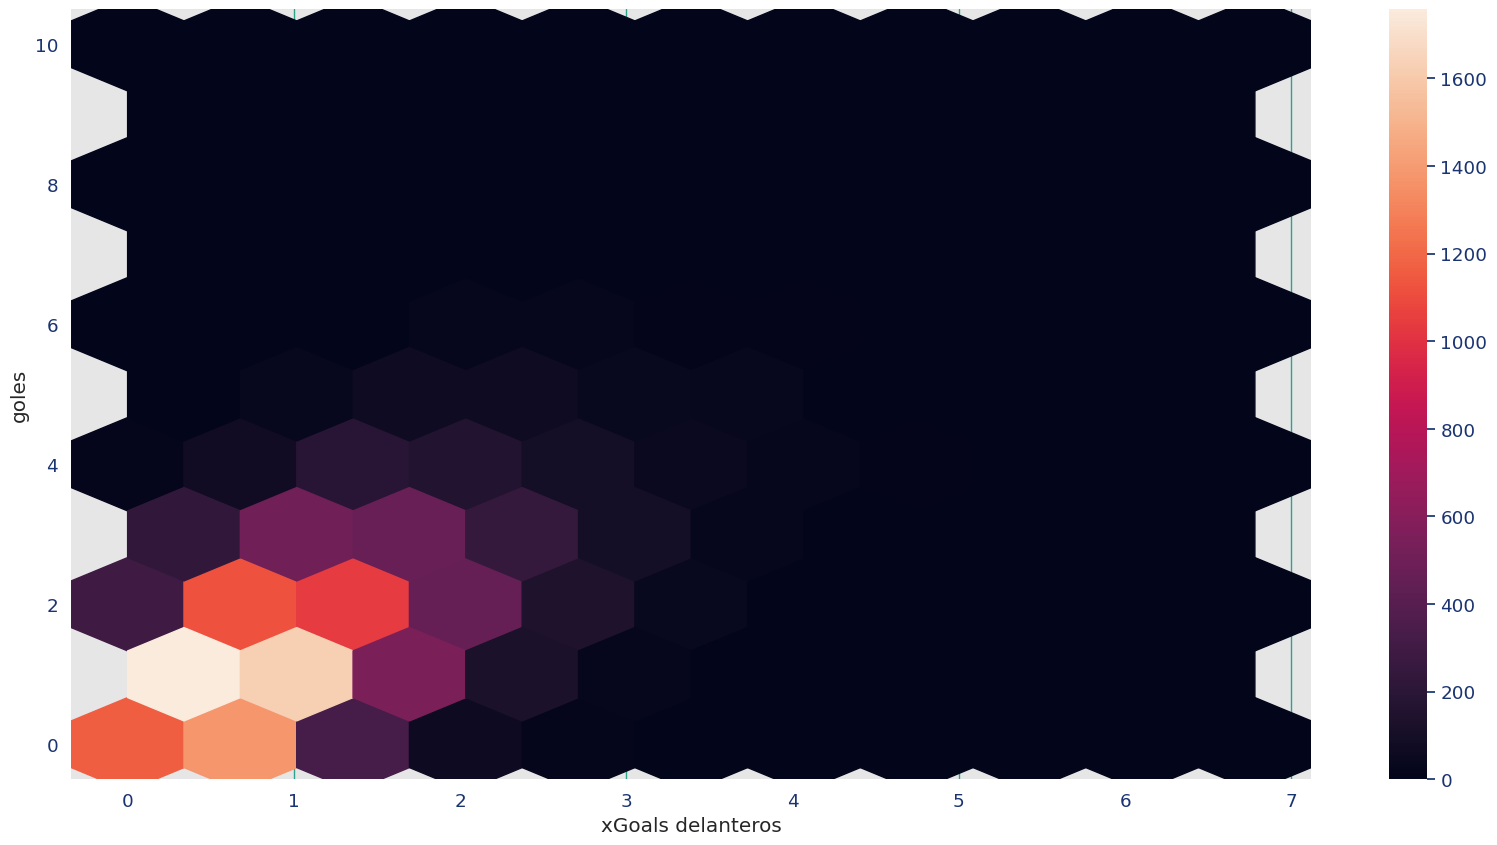

In [223]:
hb = plt.hexbin(x=df_games["xGoals_del_home"], y=df_games["homeGoals"], gridsize=10)
plt.colorbar(hb)
plt.xlabel("xGoals delanteros")
plt.ylabel("goles")
plt.show()


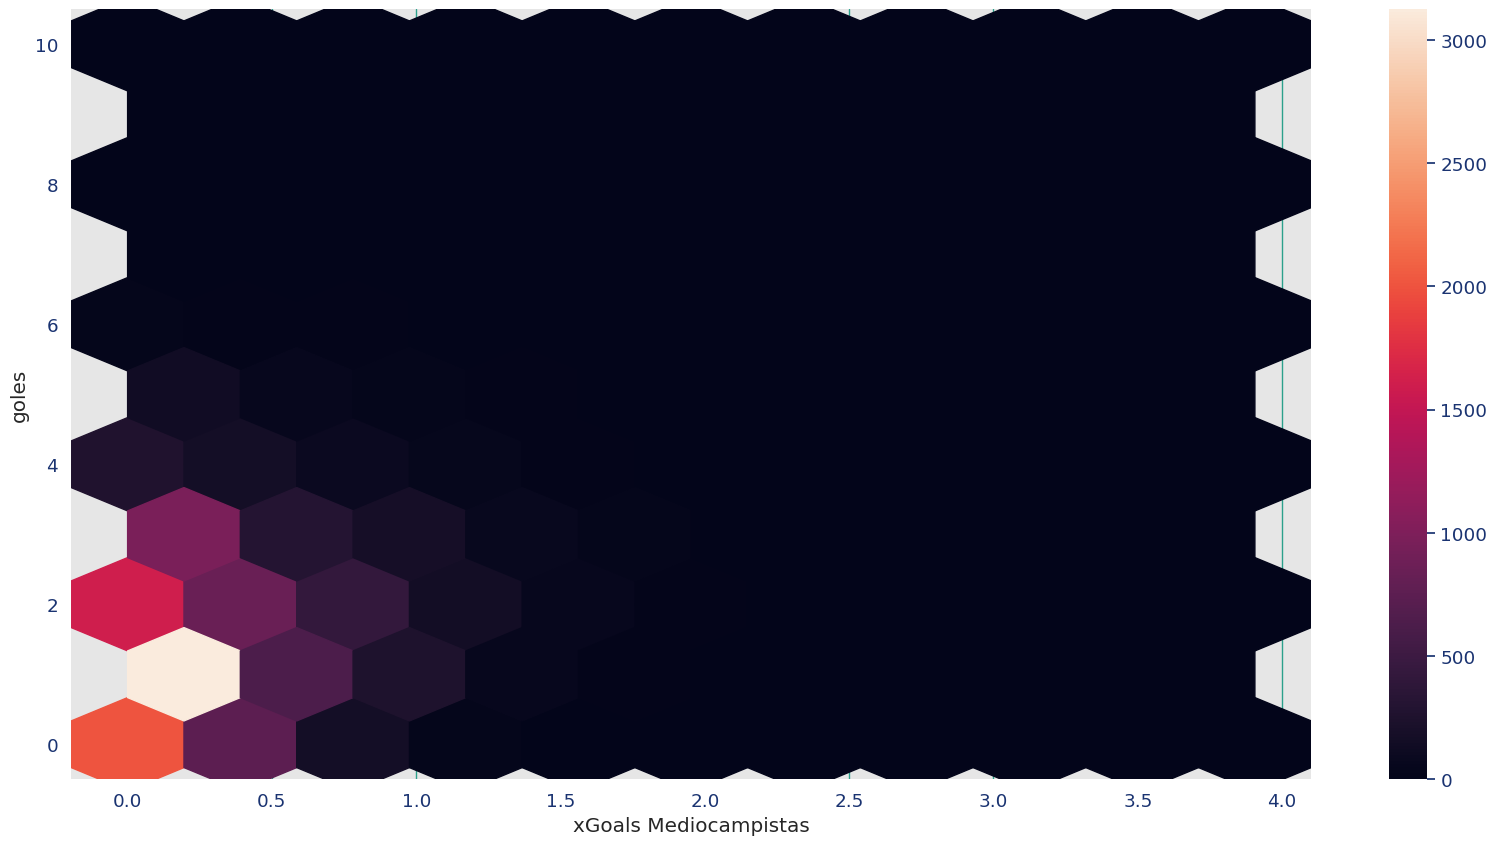

In [224]:
hb = plt.hexbin(x=df_games["xGoals_med_home"], y=df_games["homeGoals"], gridsize=10)
plt.colorbar(hb)
plt.xlabel("xGoals Mediocampistas")
plt.ylabel("goles")
plt.show()


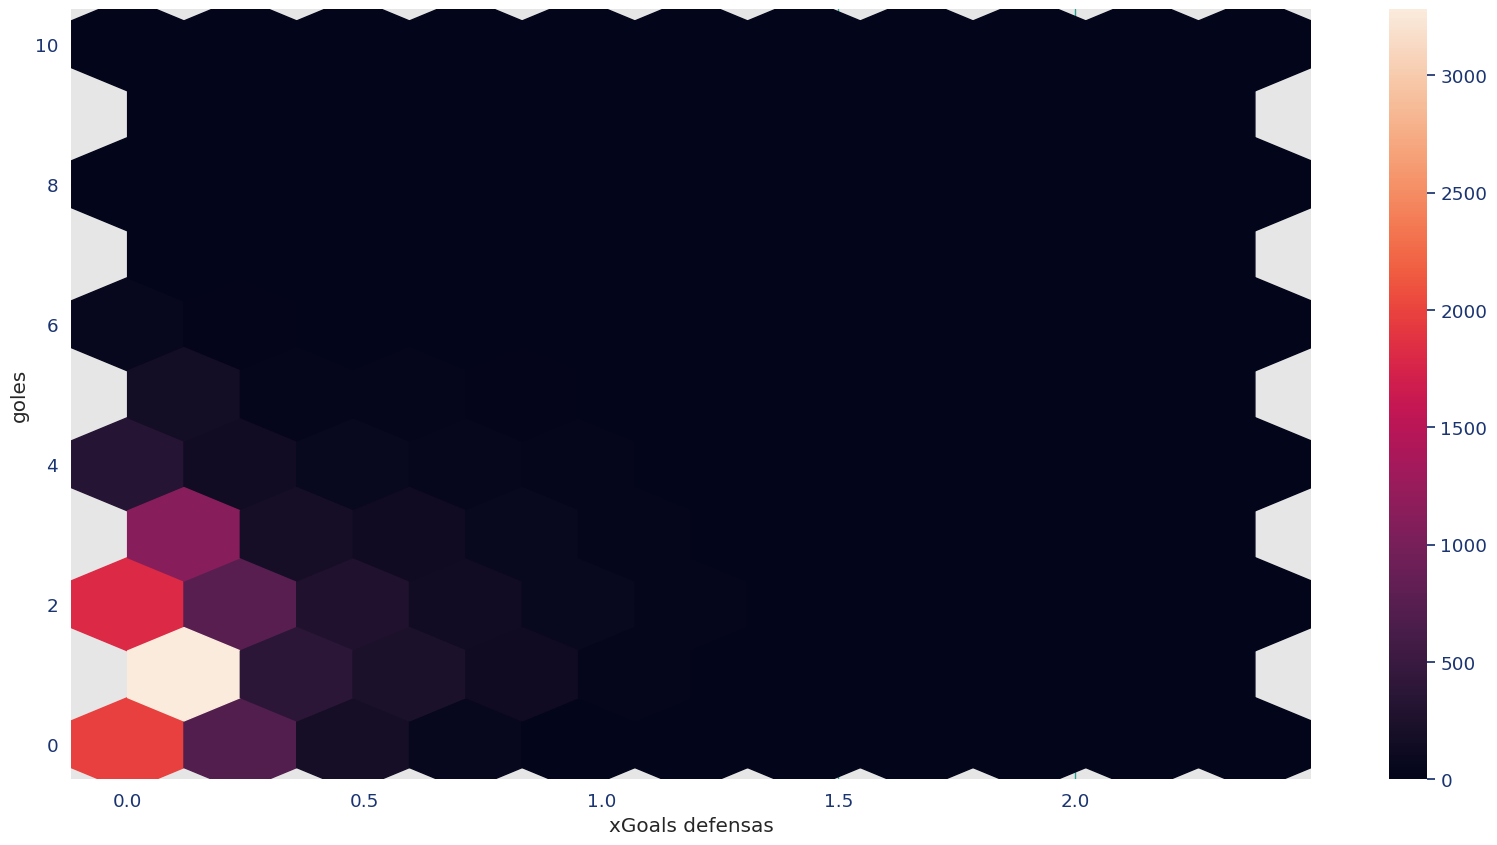

In [225]:
hb = plt.hexbin(x=df_games["xGoals_def_home"], y=df_games["homeGoals"], gridsize=10)
plt.colorbar(hb)
plt.xlabel("xGoals defensas")
plt.ylabel("goles")
plt.show()


> <font color='425FD6'> **¿El equipo local, gana mucho más que el 
visitante?**</font>

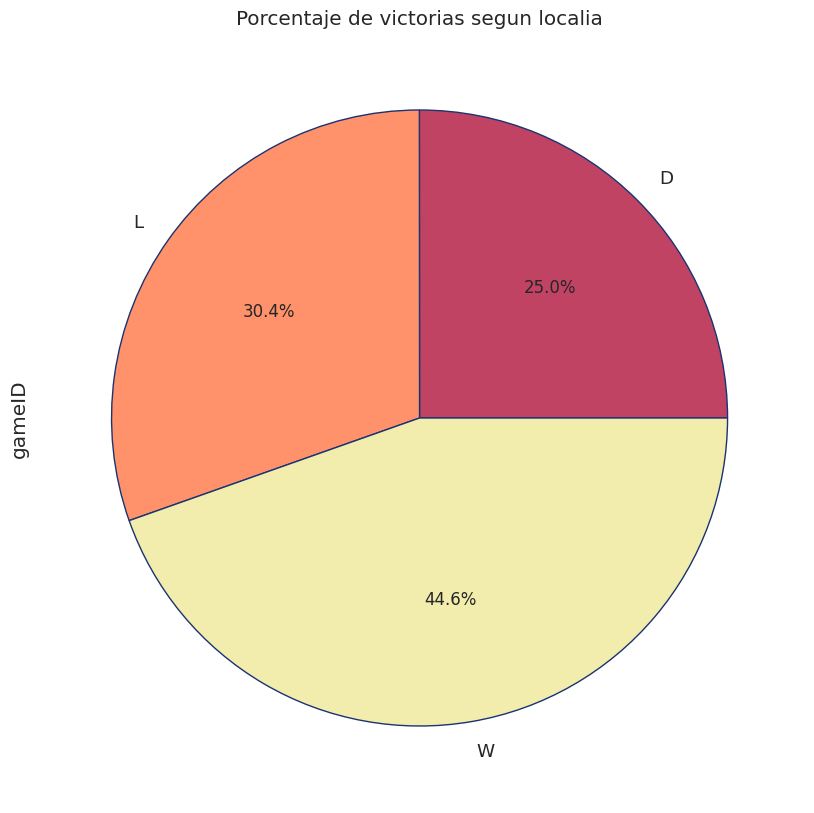

In [226]:
df_games.groupby(['result_home'])['gameID'].count().plot(kind = "pie",autopct='%1.1f%%').set_title('Porcentaje de victorias segun localia')

plt.show()

Como era de esperarse el equipo local resulta más victorioso que el visitante, aunque la diferencia es más acotada de lo que podíamos pensar.
L = Derrota del local
D = Empate
W = Victoria del local

In [227]:


df_games["goal_diff"]= abs(df_games["homeGoals"]  - df_games["awayGoals"])

df_games["diff_labels"]= df_games['goal_diff'].apply(lambda x: str(x) if x<4 else '4 o mas' )
df_games["totalGoals"]= df_games["homeGoals"]  + df_games["awayGoals"]





> <font color='425FD6'> **¿Como fue la evolucion de la cantidad de goles en las ultimas temporadas?**</font>

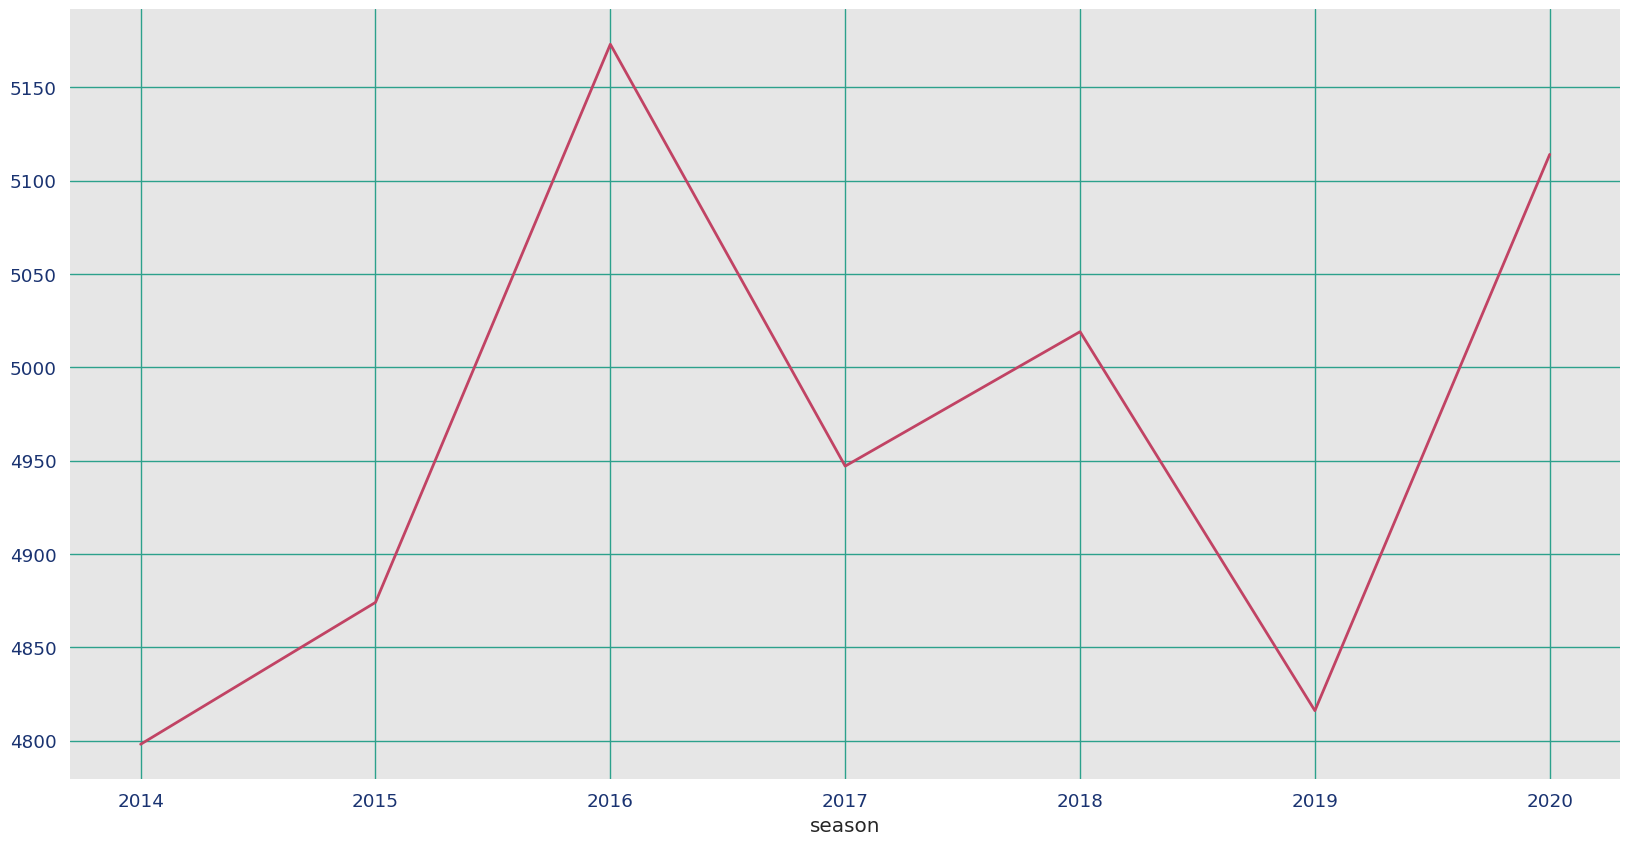

In [228]:

df_games.groupby(['season'])['totalGoals'].sum().plot()
plt.show()

Como puede apreciarse en el gráfico, no existe una relación sobre la hipótesis planteada, ya que si bien parecía que la tendencia después del año 2016 era decreciente hasta el año 2019, en el año 2020 se revirtió y casi igualó la cúspide alcanzada en el año 2016 del rango de tiempo analizado.



> <font color='425FD6'>**¿Que liga es la más atractiva para ver fútbol, o sea en cual hay más goles por partido?**</font>


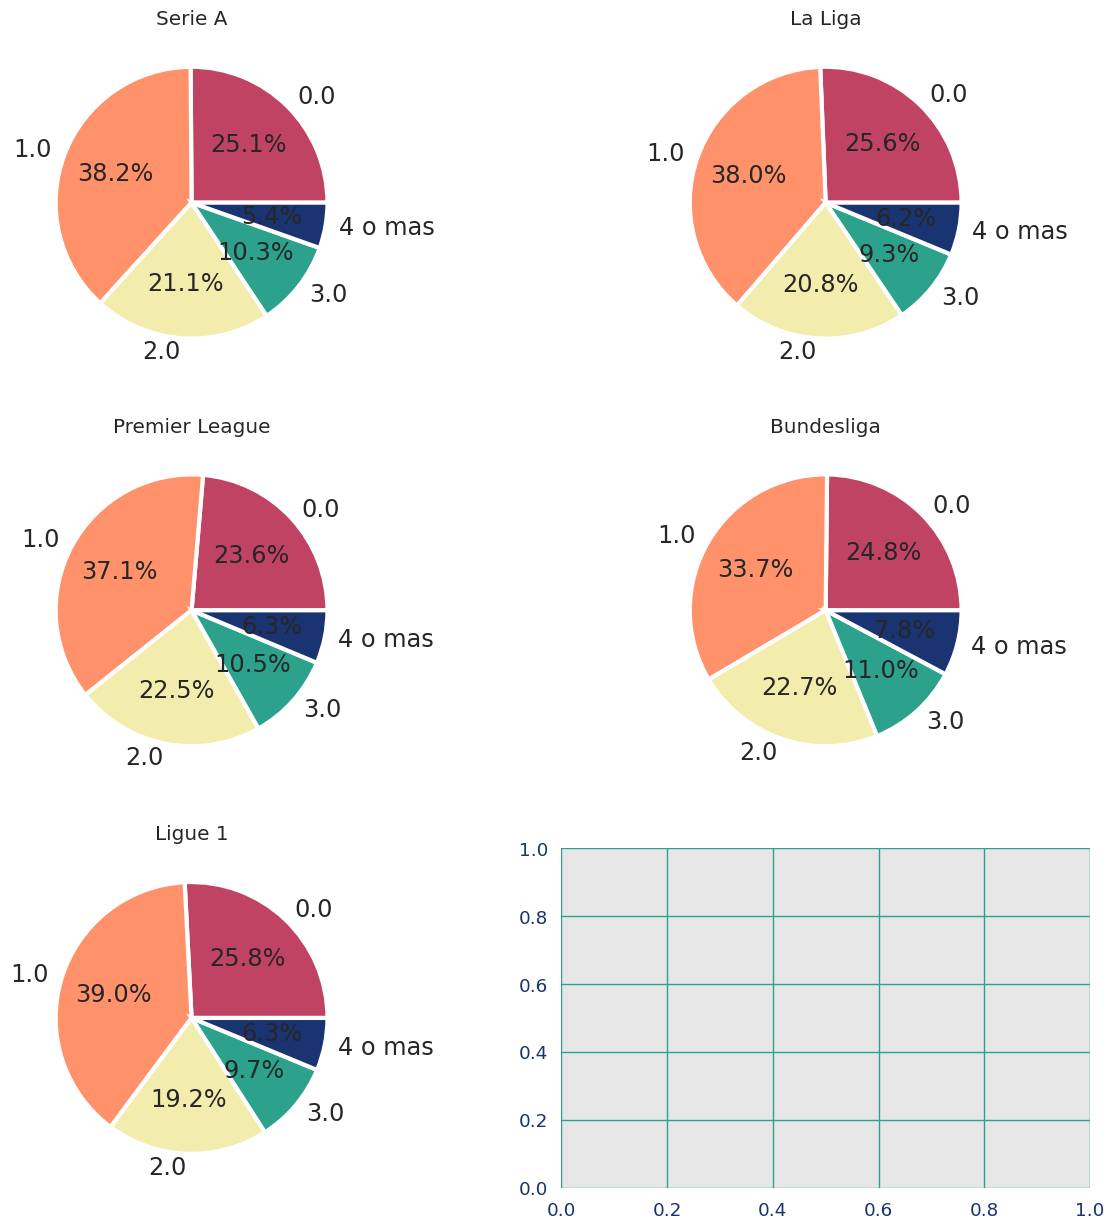

In [229]:



df_f_game_seriea=df_games.loc[df_games['liga']=="Serie A"]
df_f_game_laliga=df_games.loc[df_games['liga']=="La Liga"]
df_f_game_premier=df_games.loc[df_games['liga']=="Premier League"]
df_f_game_bundesliga=df_games.loc[df_games['liga']=="Bundesliga"]
df_f_game_ligue1=df_games.loc[df_games['liga']=="Ligue 1"]

x_seriea=df_f_game_seriea.groupby(['diff_labels'])['gameID']
x_laliga=df_f_game_laliga.groupby(['diff_labels'])['gameID']
x_premier=df_f_game_premier.groupby(['diff_labels'])['gameID']
x_bundesliga=df_f_game_bundesliga.groupby(['diff_labels'])['gameID']
x_ligue1=df_f_game_ligue1.groupby(['diff_labels'])['gameID']


fig, ax = plt.subplots(3, 2, figsize=(15, 15))
autopct='%.1f%%'
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}
textprops={'size': 'x-large'}
ax[0,0].pie(x_seriea.count(),labels= x_seriea.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[0,1].pie(x_laliga.count(),labels= x_laliga.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[1,0].pie(x_premier.count(),labels= x_premier.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[1,1].pie(x_bundesliga.count(),labels= x_bundesliga.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[2,0].pie(x_ligue1.count(),labels= x_ligue1.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[0,0].set_title('Serie A')
ax[0,1].set_title('La Liga')
ax[1,0].set_title('Premier League')
ax[1,1].set_title('Bundesliga')
ax[2,0].set_title('Ligue 1')
plt.show()

Como se puede visualizar en los gráficos, la Bundesliga y la Premier League son las más atractiva, debido a que son las que tienen el porcentaje más alto de varios goles por partido. También son las que tienen el menor porcentaje de 0 goles por partido.

### <font color='#2ca18c'>Analizamos xGoals</font>



> Agrupamos los equipos por localía y tomamos los xGoals en esa condición (local o visitante). Luego creamos una nueva variable que va a representar la diferencia de xGoals entre los contricantes

In [230]:
prom_home_xgoal=df_games.groupby(['homeTeamID'],as_index=False)
prom_away_xgoal=df_games.groupby(['awayTeamID'],as_index=False)
prom_home_xgoal=prom_home_xgoal['xGoals_home'].mean().sort_values(by="xGoals_home",ascending=False)
prom_away_xgoal=prom_away_xgoal['xGoals_away'].mean().sort_values(by="xGoals_away",ascending=False)

#se mergea con el dataset principal

df_games=pd.merge(df_games,prom_home_xgoal,   
    left_on="homeTeamID",
    right_on="homeTeamID",
    suffixes=("", "_prom")
  )

df_games=pd.merge(df_games,prom_away_xgoal,   
    left_on="awayTeamID",
    right_on="awayTeamID",
    suffixes=("", "_prom")
  )


df_games["xgoal_diff"]= df_games["xGoals_home_prom"]  - df_games["xGoals_away_prom"]

In [231]:





fig = px.histogram(df_games, x="xgoal_diff",color="result_home")
fig.show()




>En el gráfico que precede se puede observar cómo influye la diferencia de xGoals  en el resultado del partido. Cuando la diferencia es mas grande las posibilidades de que el equipo gane aumentan. 
También se observan varios outliers que en el siguiente paso los vamos a eliminar.

> Eliminamos Outliers dentro de la nueva variable creada

<Axes: xlabel='result_home', ylabel='xgoal_diff'>

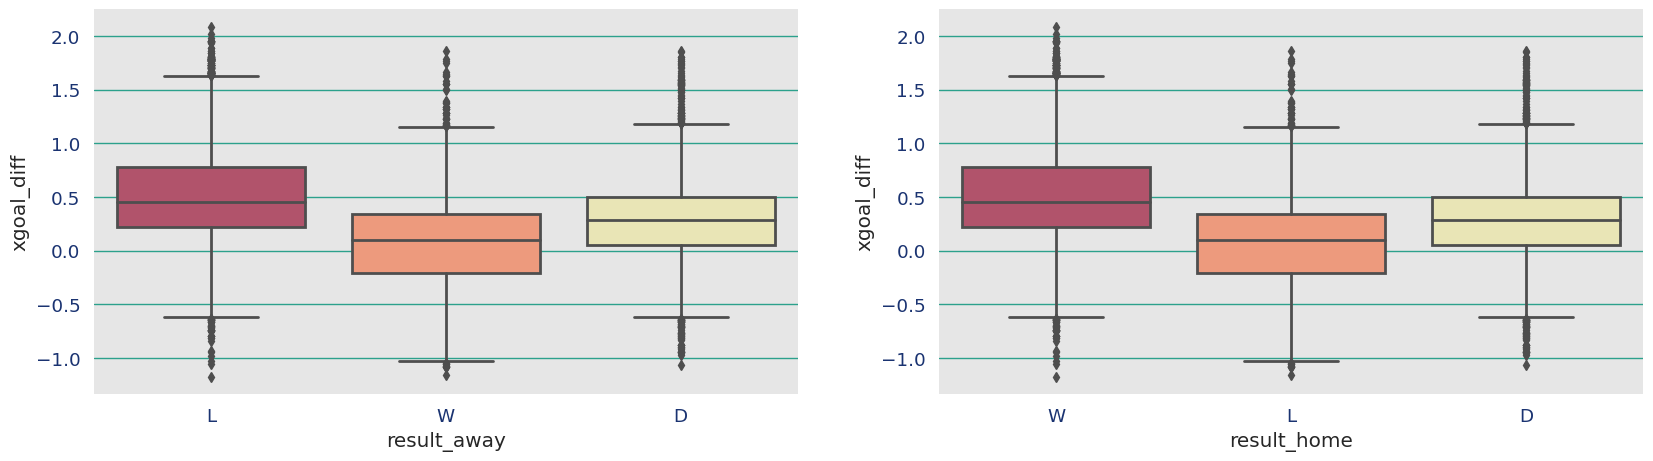

In [232]:
figbi, axesbi = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(x=df_games.result_away, y=df_games.xgoal_diff, data=df_games,ax=axesbi[0])
sns.boxplot(x=df_games.result_home, y=df_games.xgoal_diff, data=df_games,ax=axesbi[1])

In [233]:
Q1_w =  df_games['xgoal_diff'].loc[ (df_games['result_home'] == "W")].quantile(0.25)
Q3_w = df_games['xgoal_diff'].loc[ (df_games['result_home'] == "W")].quantile(0.75)
IQR_w = Q3_w - Q1_w
Higher_outlier_w = Q3_w + (IQR_w * 1.5)
lower_outlier_w = Q1_w - (IQR_w * 1.5)

Q1_l =  df_games['xgoal_diff'].loc[ (df_games['result_home'] == "L")].quantile(0.25)
Q3_l = df_games['xgoal_diff'].loc[ (df_games['result_home'] == "L")].quantile(0.75)
IQR_l = Q3_l - Q1_l
Higher_outlier_l = Q3_l + (IQR_l * 1.5)
lower_outlier_l = Q1_l - (IQR_l * 1.5)

Q1_d =  df_games['xgoal_diff'].loc[ (df_games['result_home'] == "D")].quantile(0.25)
Q3_d = df_games['xgoal_diff'].loc[ (df_games['result_home'] == "D")].quantile(0.75)
IQR_d = Q3_d - Q1_d
Higher_outlier_d = Q3_d + (IQR_d * 1.5)
lower_outlier_d = Q1_d - (IQR_d * 1.5)

df_games = df_games[ ~((df_games['result_home'] == "W") & ((df_games['xgoal_diff'] > 1.4) | (df_games['xgoal_diff'] < -0.5 )))]
df_games = df_games[ ~((df_games['result_home'] == "L") & ((df_games['xgoal_diff'] > 0.9) | (df_games['xgoal_diff'] < -0.9 ))) ]
df_games = df_games[ ~((df_games['result_home'] == "D") & ((df_games['xgoal_diff'] > 1) | (df_games['xgoal_diff'] < -0.5 )))]


<Axes: xlabel='result_home', ylabel='xgoal_diff'>

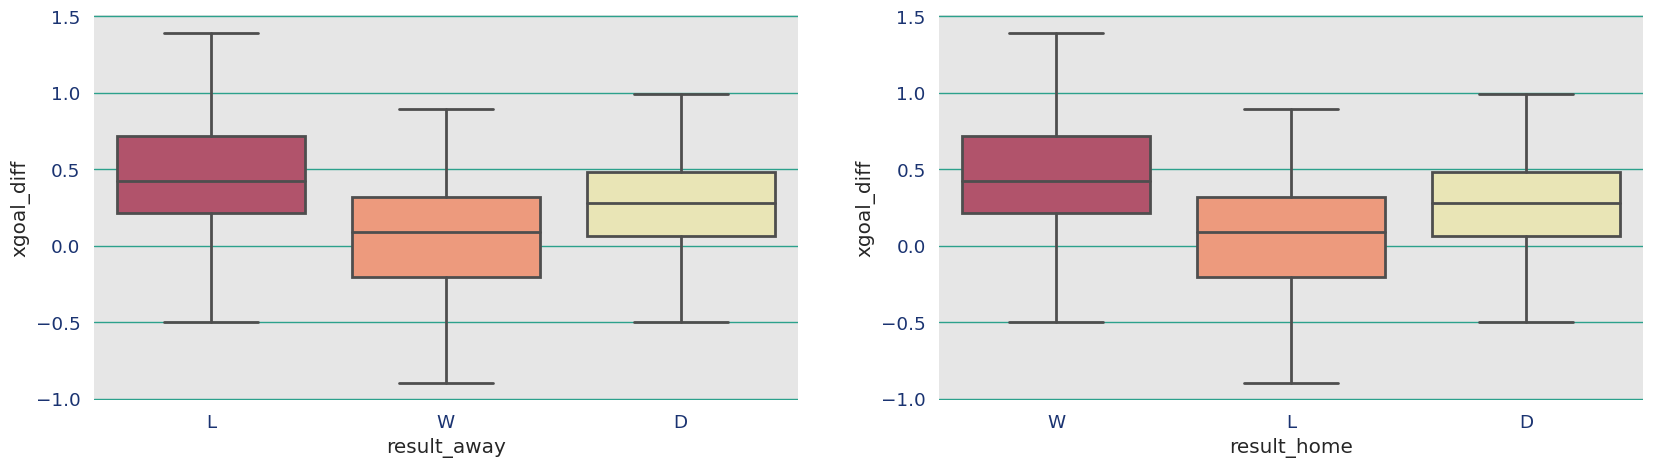

In [234]:
figbi, axesbi = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(x=df_games.result_away, y=df_games.xgoal_diff, data=df_games,ax=axesbi[0])
sns.boxplot(x=df_games.result_home, y=df_games.xgoal_diff, data=df_games,ax=axesbi[1])


## <font color='#2ca18c'>4 - INGENIERIA DE DATOS</font> <a name="Ingenieria"></a>

In [235]:
df_games = df_games[['gameID', 'season', 'date', 'homeTeamID', 'awayTeamID', 'homeGoals',
       'awayGoals','home_club_id', 'away_club_id','result_away','result_home', 'liga', 'home_name', 'away_name','diff_labels','totalGoals','goal_diff','xGoals_home_prom', 'xGoals_away_prom', 'xgoal_diff','xGoals_home', 'shots_home', 'shotsOnTarget_home',
       'deep_home', 'ppda_home', 'corners_home',  'xGoals_away',
       'shots_away', 'shotsOnTarget_away', 'deep_away', 'ppda_away',
       'corners_away', 
       'shots_def_home', 'shots_del_home',
       'shots_med_home', 'xGoals_def_home', 'xGoals_del_home',
       'xGoals_med_home', 'xGoalsChain_def_home', 'xGoalsChain_del_home',
       'xGoalsChain_med_home', 'assists_def_home', 'assists_del_home',
       'assists_med_home', 'keyPasses_def_home', 'keyPasses_del_home',
       'keyPasses_med_home', 'xAssists_def_home', 'xAssists_del_home',
       'xAssists_med_home', 'shots_def_away', 'shots_del_away',
       'shots_med_away', 'xGoals_def_away', 'xGoals_del_away',
       'xGoals_med_away', 'xGoalsChain_def_away', 'xGoalsChain_del_away',
       'xGoalsChain_med_away', 'assists_def_away', 'assists_del_away',
       'assists_med_away', 'keyPasses_def_away', 'keyPasses_del_away',
       'keyPasses_med_away', 'xAssists_def_away', 'xAssists_del_away',
       'xAssists_med_away']]

> La siguiente funcion crea una nueva columna donde el 1 representa la victoria  y el 0 puede ser empate/derrota. La vamos a utilizar despues de realizar el escalado.

In [236]:
def whowin(x):
  if x=='W':
    return 1
 
  else:
    return 0
  
df_games['all_result']=df_games['result_home'].apply(lambda x: whowin(x))

<ipython-input-236-4e1372468812>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### <font color='#2ca18c'>Escalado del dataset</font>




In [237]:
from sklearn.preprocessing import StandardScaler

>Se escaló utilizando el método de standard scaler  en todas las columnas salvo en season.

In [238]:
df_games_df_teams_col=df_games[['season','date', 'gameID', 'homeTeamID', 'awayTeamID', 'result_home','all_result','xgoal_diff','xGoals_home', 'shots_home', 'shotsOnTarget_home',
       'deep_home', 'ppda_home', 'corners_home',  'xGoals_away',
       'shots_away', 'shotsOnTarget_away', 'deep_away', 'ppda_away',
       'corners_away', 
       'shots_def_home', 'shots_del_home',
       'shots_med_home', 'xGoals_def_home', 'xGoals_del_home',
       'xGoals_med_home', 'xGoalsChain_def_home', 'xGoalsChain_del_home',
       'xGoalsChain_med_home', 'assists_def_home', 'assists_del_home',
       'assists_med_home', 'keyPasses_def_home', 'keyPasses_del_home',
       'keyPasses_med_home', 'xAssists_def_home', 'xAssists_del_home',
       'xAssists_med_home', 'shots_def_away', 'shots_del_away',
       'shots_med_away', 'xGoals_def_away', 'xGoals_del_away',
       'xGoals_med_away', 'xGoalsChain_def_away', 'xGoalsChain_del_away',
       'xGoalsChain_med_away', 'assists_def_away', 'assists_del_away',
       'assists_med_away', 'keyPasses_def_away', 'keyPasses_del_away',
       'keyPasses_med_away', 'xAssists_def_away', 'xAssists_del_away',
       'xAssists_med_away']]

In [239]:
df_games_df_teams_sum_season=df_games_df_teams_col[['season','all_result','date', 'gameID', 'homeTeamID', 'awayTeamID', 'result_home']]
df_games_df_teams_col_no_season=df_games_df_teams_col[['xgoal_diff','xGoals_home', 'shots_home', 'shotsOnTarget_home',
       'deep_home', 'ppda_home', 'corners_home',  'xGoals_away',
       'shots_away', 'shotsOnTarget_away', 'deep_away', 'ppda_away',
       'corners_away', 
       'shots_def_home', 'shots_del_home',
       'shots_med_home', 'xGoals_def_home', 'xGoals_del_home',
       'xGoals_med_home', 'xGoalsChain_def_home', 'xGoalsChain_del_home',
       'xGoalsChain_med_home', 'assists_def_home', 'assists_del_home',
       'assists_med_home', 'keyPasses_def_home', 'keyPasses_del_home',
       'keyPasses_med_home', 'xAssists_def_home', 'xAssists_del_home',
       'xAssists_med_home', 'shots_def_away', 'shots_del_away',
       'shots_med_away', 'xGoals_def_away', 'xGoals_del_away',
       'xGoals_med_away', 'xGoalsChain_def_away', 'xGoalsChain_del_away',
       'xGoalsChain_med_away', 'assists_def_away', 'assists_del_away',
       'assists_med_away', 'keyPasses_def_away', 'keyPasses_del_away',
       'keyPasses_med_away', 'xAssists_def_away', 'xAssists_del_away',
       'xAssists_med_away']]
datos_escalados=StandardScaler().fit_transform(df_games_df_teams_col_no_season)

In [240]:
df1_scaled=pd.DataFrame(datos_escalados,columns=['xgoal_diff','xGoals_home', 'shots_home', 'shotsOnTarget_home',
       'deep_home', 'ppda_home', 'corners_home',  'xGoals_away',
       'shots_away', 'shotsOnTarget_away', 'deep_away', 'ppda_away',
       'corners_away', 
       'shots_def_home', 'shots_del_home',
       'shots_med_home', 'xGoals_def_home', 'xGoals_del_home',
       'xGoals_med_home', 'xGoalsChain_def_home', 'xGoalsChain_del_home',
       'xGoalsChain_med_home', 'assists_def_home', 'assists_del_home',
       'assists_med_home', 'keyPasses_def_home', 'keyPasses_del_home',
       'keyPasses_med_home', 'xAssists_def_home', 'xAssists_del_home',
       'xAssists_med_home', 'shots_def_away', 'shots_del_away',
       'shots_med_away', 'xGoals_def_away', 'xGoals_del_away',
       'xGoals_med_away', 'xGoalsChain_def_away', 'xGoalsChain_del_away',
       'xGoalsChain_med_away', 'assists_def_away', 'assists_del_away',
       'assists_med_away', 'keyPasses_def_away', 'keyPasses_del_away',
       'keyPasses_med_away', 'xAssists_def_away', 'xAssists_del_away',
       'xAssists_med_away'],index=df_games_df_teams_col_no_season.index)

df_games_df_teams_sum=pd.concat([df_games_df_teams_sum_season,df1_scaled], axis=1)




In [241]:
df_games_df_teams_sum.dropna(inplace=True)

> Elegimos las columnas que utilizaremos para el modelado.

In [242]:
df_roll=df_games_df_teams_sum[['date','all_result','season','gameID','homeTeamID','awayTeamID' ,'xgoal_diff','xGoals_home', 'shots_home', 'shotsOnTarget_home', 'deep_home',
       'ppda_home',  'corners_home',
       'xGoals_away', 'shots_away',
       'shotsOnTarget_away', 'deep_away', 'ppda_away',
       'corners_away','result_home', 'shots_def_home', 'shots_del_home',
       'shots_med_home', 'xGoals_def_home', 'xGoals_del_home',
       'xGoals_med_home', 'xGoalsChain_def_home', 'xGoalsChain_del_home',
       'xGoalsChain_med_home', 'assists_def_home', 'assists_del_home',
       'assists_med_home', 'keyPasses_def_home', 'keyPasses_del_home',
       'keyPasses_med_home', 'xAssists_def_home', 'xAssists_del_home',
       'xAssists_med_home', 'shots_def_away', 'shots_del_away',
       'shots_med_away', 'xGoals_def_away', 'xGoals_del_away',
       'xGoals_med_away', 'xGoalsChain_def_away', 'xGoalsChain_del_away',
       'xGoalsChain_med_away', 'assists_def_away', 'assists_del_away',
       'assists_med_away', 'keyPasses_def_away', 'keyPasses_del_away',
       'keyPasses_med_away', 'xAssists_def_away', 'xAssists_del_away',
       'xAssists_med_away']]


df_roll.drop(columns='result_home',axis=1,inplace=True)


<ipython-input-242-5a1608f95554>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy









### <font color='#2ca18c'> Optimización de feature engineering</font>

> creamos una nueva columna donde se va a representar el promedio de los 3 ultimos xGoals de cada equipo, como tambien otras estadisticas de cada partido.

> creamos una funcion donde va a tomar un grupo de un groupBy, las columnas de las cuales va crear una nueva columna con los promedios de los ultimos 3 partidos. El tercer parametro va a ser los nombres de las nuevas columnas.

In [243]:
def rolling_averages(group,cols,new_cols):
    group=group.sort_values('date')
    rolling_stats=group[cols].rolling(10,closed='left').mean()
    group[new_cols]=rolling_stats
    group=group.dropna(subset=new_cols)
    return group

In [244]:
cols_home=['xGoals_home', 'shots_home', 'shotsOnTarget_home', 'deep_home',
       'ppda_home',  'corners_home','shots_def_home', 'shots_del_home',
       'shots_med_home', 'xGoals_def_home', 'xGoals_del_home',
       'xGoals_med_home', 'xGoalsChain_def_home', 'xGoalsChain_del_home',
       'xGoalsChain_med_home', 'assists_def_home', 'assists_del_home',
       'assists_med_home', 'keyPasses_def_home', 'keyPasses_del_home',
       'keyPasses_med_home', 'xAssists_def_home', 'xAssists_del_home',
       'xAssists_med_home']
new_cols_home=[f'{c}_rolling' for c in cols_home]


In [245]:
cols_away=['xGoals_away', 'shots_away',
       'shotsOnTarget_away', 'deep_away', 'ppda_away',
       'corners_away', 'shots_def_away', 'shots_del_away',
       'shots_med_away', 'xGoals_def_away', 'xGoals_del_away',
       'xGoals_med_away', 'xGoalsChain_def_away', 'xGoalsChain_del_away',
       'xGoalsChain_med_away', 'assists_def_away', 'assists_del_away',
       'assists_med_away', 'keyPasses_def_away', 'keyPasses_del_away',
       'keyPasses_med_away', 'xAssists_def_away', 'xAssists_del_away',
       'xAssists_med_away']
new_cols_away=[f'{c}_rolling' for c in cols_away]

In [246]:
home_grouped_matches=df_roll.groupby('homeTeamID').apply(lambda x: rolling_averages(x,cols_home,new_cols_home) )
away_grouped_matches=df_roll.groupby('awayTeamID').apply(lambda x: rolling_averages(x,cols_away,new_cols_away) )

In [247]:
home_grouped_matches=home_grouped_matches.droplevel('homeTeamID')
away_grouped_matches=away_grouped_matches.droplevel('awayTeamID')

In [248]:
home_rolling=home_grouped_matches[['gameID', 'xGoals_home_rolling', 'shots_home_rolling',
       'shotsOnTarget_home_rolling', 'deep_home_rolling', 'ppda_home_rolling',
       'corners_home_rolling', 'shots_def_home_rolling',
       'shots_del_home_rolling', 'shots_med_home_rolling',
       'xGoals_def_home_rolling', 'xGoals_del_home_rolling',
       'xGoals_med_home_rolling', 'xGoalsChain_def_home_rolling',
       'xGoalsChain_del_home_rolling', 'xGoalsChain_med_home_rolling',
       'assists_def_home_rolling', 'assists_del_home_rolling',
       'assists_med_home_rolling', 'keyPasses_def_home_rolling',
       'keyPasses_del_home_rolling', 'keyPasses_med_home_rolling',
       'xAssists_def_home_rolling', 'xAssists_del_home_rolling',
       'xAssists_med_home_rolling']]

away_rolling=away_grouped_matches[['gameID','xGoals_away_rolling', 'shots_away_rolling',
       'shotsOnTarget_away_rolling', 'deep_away_rolling', 'ppda_away_rolling',
       'corners_away_rolling', 'shots_def_away_rolling',
       'shots_del_away_rolling', 'shots_med_away_rolling',
       'xGoals_def_away_rolling', 'xGoals_del_away_rolling',
       'xGoals_med_away_rolling', 'xGoalsChain_def_away_rolling',
       'xGoalsChain_del_away_rolling', 'xGoalsChain_med_away_rolling',
       'assists_def_away_rolling', 'assists_del_away_rolling',
       'assists_med_away_rolling', 'keyPasses_def_away_rolling',
       'keyPasses_del_away_rolling', 'keyPasses_med_away_rolling',
       'xAssists_def_away_rolling', 'xAssists_del_away_rolling',
       'xAssists_med_away_rolling']]

home_away=pd.merge(home_rolling,away_rolling)
df_roll=pd.merge(df_roll,home_away)


In [249]:
pd.options.display.max_seq_items = 2000
df_roll.columns


Index(['date', 'all_result', 'season', 'gameID', 'homeTeamID', 'awayTeamID',
       'xgoal_diff', 'xGoals_home', 'shots_home', 'shotsOnTarget_home',
       'deep_home', 'ppda_home', 'corners_home', 'xGoals_away', 'shots_away',
       'shotsOnTarget_away', 'deep_away', 'ppda_away', 'corners_away',
       'shots_def_home', 'shots_del_home', 'shots_med_home', 'xGoals_def_home',
       'xGoals_del_home', 'xGoals_med_home', 'xGoalsChain_def_home',
       'xGoalsChain_del_home', 'xGoalsChain_med_home', 'assists_def_home',
       'assists_del_home', 'assists_med_home', 'keyPasses_def_home',
       'keyPasses_del_home', 'keyPasses_med_home', 'xAssists_def_home',
       'xAssists_del_home', 'xAssists_med_home', 'shots_def_away',
       'shots_del_away', 'shots_med_away', 'xGoals_def_away',
       'xGoals_del_away', 'xGoals_med_away', 'xGoalsChain_def_away',
       'xGoalsChain_del_away', 'xGoalsChain_med_away', 'assists_def_away',
       'assists_del_away', 'assists_med_away', 'keyPasses_def_aw

In [250]:
df_roll=df_roll[['date','all_result','season', 
              #    'xgoal_diff', se comento porque este dato cuenta como estadistica actual del partido
       'xGoals_home_rolling', 'shots_home_rolling',
       'shotsOnTarget_home_rolling', 'deep_home_rolling', 'ppda_home_rolling',
       'corners_home_rolling', 'shots_def_home_rolling',
       'shots_del_home_rolling', 'shots_med_home_rolling',
       'xGoals_def_home_rolling', 'xGoals_del_home_rolling',
       'xGoals_med_home_rolling', 'xGoalsChain_def_home_rolling',
       'xGoalsChain_del_home_rolling', 'xGoalsChain_med_home_rolling',
       'assists_def_home_rolling', 'assists_del_home_rolling',
       'assists_med_home_rolling', 'keyPasses_def_home_rolling',
       'keyPasses_del_home_rolling', 'keyPasses_med_home_rolling',
       'xAssists_def_home_rolling', 'xAssists_del_home_rolling',
       'xAssists_med_home_rolling','xGoals_away_rolling', 'shots_away_rolling',
       'shotsOnTarget_away_rolling', 'deep_away_rolling', 'ppda_away_rolling',
       'corners_away_rolling', 'shots_def_away_rolling',
       'shots_del_away_rolling', 'shots_med_away_rolling',
       'xGoals_def_away_rolling', 'xGoals_del_away_rolling',
       'xGoals_med_away_rolling', 'xGoalsChain_def_away_rolling',
       'xGoalsChain_del_away_rolling', 'xGoalsChain_med_away_rolling',
       'assists_def_away_rolling', 'assists_del_away_rolling',
       'assists_med_away_rolling', 'keyPasses_def_away_rolling',
       'keyPasses_del_away_rolling', 'keyPasses_med_away_rolling',
       'xAssists_def_away_rolling', 'xAssists_del_away_rolling',
       'xAssists_med_away_rolling']]

df_roll['date']=pd.to_datetime(df_roll['date'])
df_roll['date']=pd.to_datetime(df_roll['date'].dt.date)
df_roll.sort_values(by='date',inplace=True)

test=df_roll.loc[df_roll["season"]>2018]
train=df_roll.loc[df_roll["season"]<=2017]



y_train = train['all_result']
x_train = train.drop('all_result',axis= 1)

y_test = test['all_result']
x_test = test.drop('all_result',axis= 1)


<ipython-input-250-25e58c54d316>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-250-25e58c54d316>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-250-25e58c54d316>:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [251]:

x_train = x_train.drop(columns={'season','date'},axis= 1)
x_test = x_test.drop(columns={'season','date'},axis= 1)

## <font color='#2ca18c'>5 - MODELADO </font> <a name="Modelado"></a>

>Importamos los paquetes necesarios.


In [252]:
import sklearn.preprocessing 

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier  
from sklearn import tree #

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import statsmodels.api as sm

In [253]:

x = df_roll.loc[:, df_roll.columns != 'all_result']
y = df_roll.loc[:, df_roll.columns == 'all_result']

x.drop(columns={'date','season'},inplace=True)



<ipython-input-253-fbcbb09a3020>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




#### <font color='#2ca18c'>Árbol de decisión </font> 

>Se optó por utilizar un árbol de decisión como algoritmo de clasificación para entrenar el modelo con los datos elegidos.
Antes de utilizarlo, se decidió asignarle un 1 a las victorias y un 0 a cualquier otro tipo de resultados (empates y derrotas).

>Se utilizó un training set con los datos menores obtenidos al año 2017 inclusive. El test set se realizó con los años posteriores a dicho año.

>Primero buscamos los mejores hiperparametros para el modelo

In [254]:


# Guardamos los hiperparametros a probar en un diccionario 
params = {
    'n_estimators' : [50,100,200,300,400,500,600,700,800],
    'max_features': [2,40],
    'max_depth':[4,5]
}

# Este es nuestro modelo elegido
rf=RandomForestClassifier()

In [255]:
grid_random_forest = GridSearchCV(estimator = rf, #el modelo
                                  param_grid = params, #los parametros a probar
                                  scoring = 'neg_mean_absolute_error',  # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                                  verbose = 1, #Muestra el resultado en pantalla
                                  n_jobs = -1) # corrida en paralelo

In [256]:
grid_random_forest.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


KeyboardInterrupt: ignored

>Esta es la mejor configuracion de los hiperparametros

In [ ]:
grid_random_forest.best_estimator_

>Agregamos en la configuracion los hiperparametros que recibimos del GridSearchCV

In [ ]:
mejor_modelo = RandomForestClassifier(max_depth=4, max_features=40, n_estimators=800) 

In [ ]:
mejor_modelo.fit(x_train,y_train)
predictions=mejor_modelo.predict(x_test)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,predictions)
print('la precision del modelo es: ',acc)

>Se utilizó la métrica del accuracy para demostrar la eficiencia del método. El mismo es de un 0.64, es decir que las predicciones efectuadas sobre si un equipo gana o no tiene una precisión de un 58%, o sea en la mayor cantidad de los casos acierta.

>Graficamos la importancia que tiene cada columna en el modelo elegido

In [ ]:
feature_imp = pd.Series(mejor_modelo.feature_importances_).sort_values(ascending=False)
feature_imp

sns.barplot(x=feature_imp.index, y= feature_imp)

plt.ylabel('Importancia')
plt.xlabel('Columnas')
plt.show()

In [ ]:
sklearn.metrics.SCORERS.keys() 
plt.figure(figsize=(10,6))
ConfusionMatrixDisplay.from_estimator(mejor_modelo, x_test, y_test, display_labels=['Negative', 'Positive'])



##### <font color='#2ca18c'>**Precision** </font> 

In [ ]:
preds = mejor_modelo.predict(x_test) 

precision = metrics.precision_score(y_test, preds)
precision




##### <font color='#2ca18c'>**Recall**</font> 

In [ ]:
recall = metrics.recall_score(y_test, preds)
recall

>Con la métrica precisión se busca minimizar los falsos positivos y con recall se busca minimizar los falsos negativos. Ambos valores son muy similares, como puede visualizarse.



##### <font color='#2ca18c'>**F1**</font> 

In [ ]:
f1_score = metrics.f1_score(y_test, preds)
f1_score 

>Como era de esperarse al no ser valores muy altos de precisión y de recall, el F1 tampoco lo será, ya que su cálculo depende de los parámetros mencionados.

In [ ]:
preds_train = mejor_modelo.predict(x_train) 



##### <font color='#2ca18c'> **Underfitting u Overfitting**</font> 

In [ ]:
train_accuracy = metrics.accuracy_score(y_train, preds_train)
train_accuracy 

In [280]:
preds_test = mejor_modelo.predict(x_test) 

test_accuracy = metrics.accuracy_score(y_test, preds_test)
test_accuracy 

0.6522988505747126

>Al evaluar si encuadra dentro de un modelo underfitting-overfitting, se puede concluir que el modelo se encuentra con valores óptimos, que no lo encasilla en un tipo, ni otro,  ya que las predicciones con el set de entrenamiento y el set de prueba tienen score de precision cercanos




##### <font color='#2ca18c'> **Curva OCR**</font> 

In [261]:
mejor_modelo.predict_proba(x_test)[0:10]

array([[0.14535124, 0.85464876],
       [0.84632181, 0.15367819],
       [0.50984012, 0.49015988],
       [0.49738485, 0.50261515],
       [0.33416847, 0.66583153],
       [0.78718036, 0.21281964],
       [0.58645161, 0.41354839],
       [0.53021114, 0.46978886],
       [0.50809983, 0.49190017],
       [0.60443431, 0.39556569]])

In [262]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score1 = mejor_modelo.predict_proba(x_test)[:,1]
y_score1[0:10]

array([0.85464876, 0.15367819, 0.49015988, 0.50261515, 0.66583153,
       0.21281964, 0.41354839, 0.46978886, 0.49190017, 0.39556569])

In [263]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

In [264]:
true_positive_rate1

array([0.00000000e+00, 7.67459708e-04, 6.13967767e-03, ...,
       9.99232540e-01, 1.00000000e+00, 1.00000000e+00])

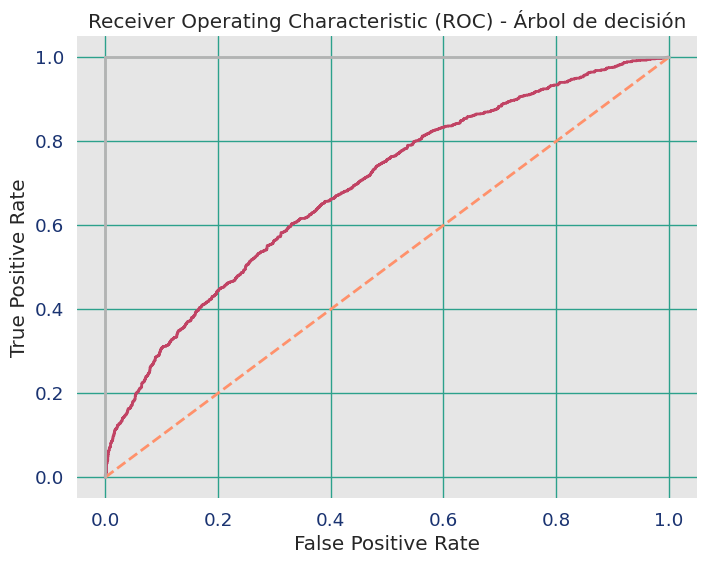

In [267]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic (ROC) - Árbol de decisión')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [266]:
print('roc_auc_score para árbol de decisión: ', roc_auc_score(y_test, y_score1))

roc_auc_score for DecisionTree:  0.6890508382262911


El 69% de las veces el modelo diferencia entra las clases positivo y negativo.

In [ ]:
from sklearn.decomposition import PCA
#Aplicacion de PCA
pca = PCA()
X_train_1 = pca.fit_transform(x_train)
X_test_1 = pca.transform(x_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

In [ ]:
PC_components = np.arange(pca.n_components_) + 1

figure = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
figure = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
figure = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [ ]:
pca = PCA(n_components=3)  #que pasa si lo cambiamos a 1 componente? mejor o peor?
x_train_menos = pca.fit_transform(x_train)
x_test_menos = pca.transform(x_test)

In [ ]:
## Creación del modelo
#model_rf = RandomForestClassifier(max_depth=2, random_state=0)
#model_rf.fit(x_train_menos, x_test_menos)

# Predicción
#y_pred = model_rf.predict(x_test_menos)





##### <font color='#2ca18c'> KNN</font> 

In [ ]:

acc = []
number_clusters=range(1,50)


for i in number_clusters:
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    y_pred = neigh.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred))




plt.figure(figsize=(10,6))
plt.plot(number_clusters,acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xticks(number_clusters)
plt.xlabel('K')
plt.ylabel('Accuracy')

##### <font color='#2ca18c'> SVM</font> 


In [ ]:
from sklearn import svm

svm = svm.SVC(kernel='linear')

svm.fit(x_train, y_train)

y_pred_svm = svm.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

In [257]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72      1829
           1       0.60      0.50      0.55      1303

    accuracy                           0.65      3132
   macro avg       0.64      0.63      0.63      3132
weighted avg       0.65      0.65      0.65      3132



In [258]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72      1829
           1       0.60      0.50      0.55      1303

    accuracy                           0.65      3132
   macro avg       0.64      0.63      0.63      3132
weighted avg       0.65      0.65      0.65      3132







##### <font color='#2ca18c'> Regresión logística</font> 

>Empezamos a implementar el modelo de regresión logística

> Preparamos el modelo donde vamos a dividir el datasets en las partes de testeo y entrenamientos

In [268]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(max_iter=20000, n_jobs=-1)
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=20000, n_jobs=-1)

In [270]:
y_pred = logreg.predict(x_test)
print('Accuracy con el modelo de regresión logística: {:.6f}'.format(logreg.score(x_test, y_test)))

Accuracy con el modelo de regresión logística: 0.653895


>Matriz de confusión según regresión logística

<Figure size 1000x600 with 0 Axes>

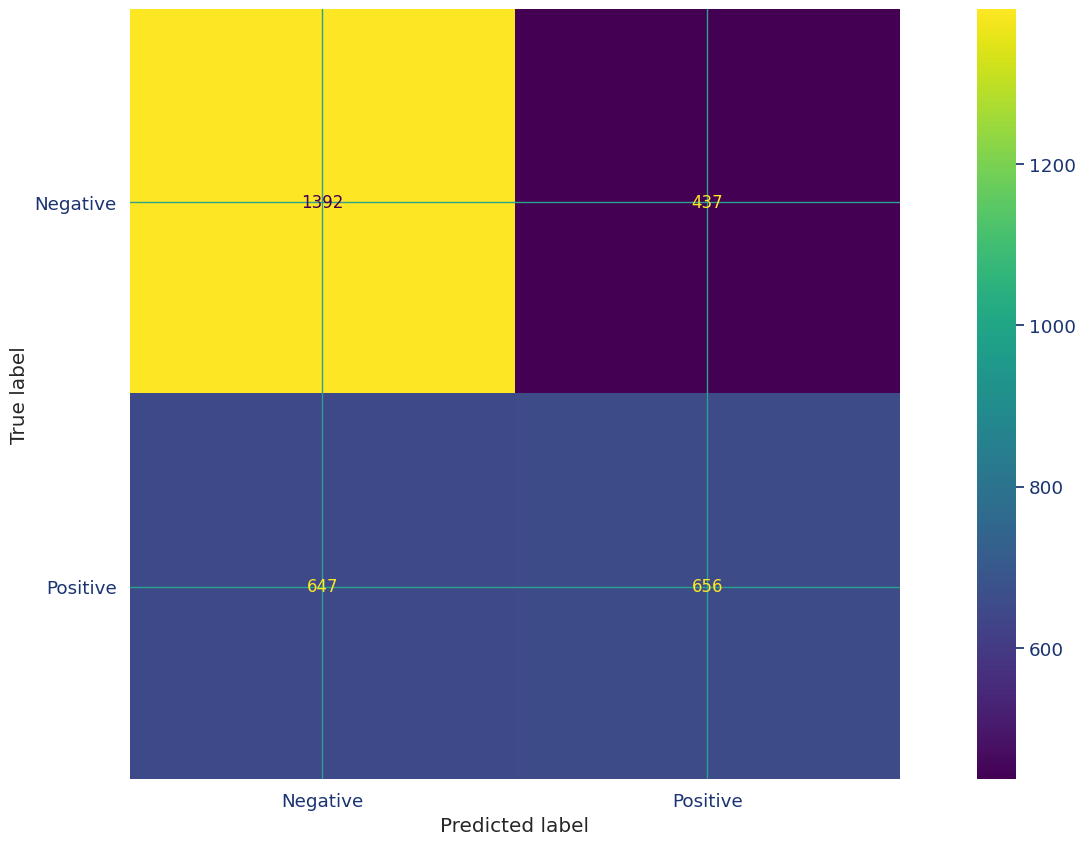

In [271]:
sklearn.metrics.SCORERS.keys() 
plt.figure(figsize=(10,6))
ConfusionMatrixDisplay.from_estimator(logreg, x_test, y_test, display_labels=['Negative', 'Positive'])

>Cuadro resumen de métricas 

In [272]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72      1829
           1       0.60      0.50      0.55      1303

    accuracy                           0.65      3132
   macro avg       0.64      0.63      0.63      3132
weighted avg       0.65      0.65      0.65      3132





##### <font color='#2ca18c'> **Curva OCR**</font> 

In [273]:
logreg.predict_proba(x_test)[0:10]

array([[0.1399631 , 0.8600369 ],
       [0.81554897, 0.18445103],
       [0.47547515, 0.52452485],
       [0.48479585, 0.51520415],
       [0.19541406, 0.80458594],
       [0.9106621 , 0.0893379 ],
       [0.65854456, 0.34145544],
       [0.53541132, 0.46458868],
       [0.49934664, 0.50065336],
       [0.54577214, 0.45422786]])

In [274]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score1 = logreg.predict_proba(x_test)[:,1]
y_score1[0:10]

array([0.8600369 , 0.18445103, 0.52452485, 0.51520415, 0.80458594,
       0.0893379 , 0.34145544, 0.46458868, 0.50065336, 0.45422786])

In [275]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

In [276]:
true_positive_rate1

array([0.        , 0.        , 0.0038373 , ..., 0.99923254, 1.        ,
       1.        ])

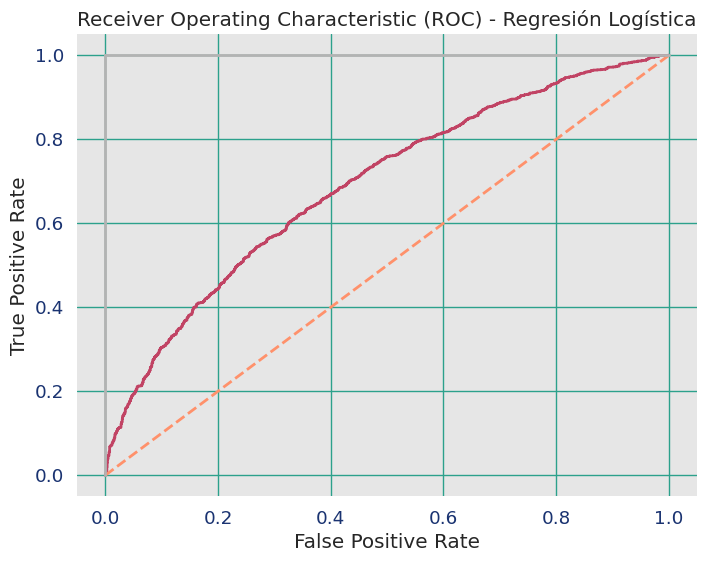

In [277]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic (ROC) - Regresión Logística')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [279]:
print('roc_auc_score para árbol de decisión: ', roc_auc_score(y_test, y_score1))

roc_auc_score para árbol de decisión:  0.6898434743056252


Tal como fue el árbol de decisión, este modelo (regresión logística) 69% de las veces el modelo diferencia entra las clases positivo y negativo.

## <font color='#2ca18c'>8 - SCRAPING DE DATOS</font> <a name="API"></a>


>Gracias al scraping se logro juntar datos de la pagina FBREF y se guardo en un archivo excel llamado matches.ipynb. Tenemos una nueva columna como la alineacion del equipo y otras como los cruces ganados en los partidos.

In [ ]:
import requests
import pandas as pd
from pandas import json_normalize 
from bs4 import BeautifulSoup
import time

Descomentar para probar, ya que tarda mas de 3 horas en terminar.

In [ ]:
# lista_ligas = [
#     "https://fbref.com/en/comps/12/2021-2022/2021-2022-La-Liga-Stats",
#     "https://fbref.com/en/comps/9/2021-2022/2021-2022-Premier-League-Stats",
#     "https://fbref.com/en/comps/11/2021-2022/2021-2022-Serie-A-Stats",
#     "https://fbref.com/en/comps/13/2021-2022/2021-2022-Ligue-1-Stats",
#     "https://fbref.com/en/comps/20/2021-2022/2021-2022-Bundesliga-Stats",
# ]

# years = list(range(2021, 2013, -1))
# all_matches = []
# log_error = []
# log = []
# for year in years:
#     for indice, liga in enumerate(lista_ligas):
#         data = requests.get(liga)
#         soup = BeautifulSoup(data.text)

#         try:
#             standings_table = soup.select("table.stats_table")[0]
#         except Exception as e:
            
#             continue

#         links = [l.get("href") for l in standings_table.find_all("a")]
#         links = [l for l in links if "/squads/" in l]
#         team_urls = [f"https://fbref.com{l}" for l in links]

#         previous_season = soup.select("a.prev")[0].get("href")
        

#         time.sleep(1)
#         for team_url in team_urls:
            
#             team_name = team_url.split("/")[-1].replace("-Stats", "").replace("-", " ")
#             data = requests.get(team_url)
#             time.sleep(1)
#             try:
#                 matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
#                 matches = matches[
#                     [
#                         "Date",
#                         "Time",
#                         "Comp",
#                         "Round",
#                         "Venue",
#                         "Result",
#                         "GF",
#                         "GA",
#                         "Opponent",
#                         "Poss",
#                         "Formation",
#                     ]
#                 ]
#                 soup = BeautifulSoup(data.text)
#                 links = [l.get("href") for l in soup.find_all("a")]
#                 time.sleep(1)
#             except Exception as e:
#                 log_error.append(f"error:{e},{lista_ligas[indice]},{team_url}")
#                 continue

#             try:
#                 links_shooting = [l for l in links if l and "all_comps/shooting/" in l]
#                 data_shooting = requests.get(f"https://fbref.com{links_shooting[0]}")
#                 shooting = pd.read_html(data_shooting.text, match="Shooting")[0]
#                 shooting.columns = shooting.columns.droplevel()
#                 time.sleep(1)
#             except Exception as e:
                
#                 continue

#             try:
#                 links_misc = [l for l in links if l and "all_comps/misc/" in l]
#                 data_misc = requests.get(f"https://fbref.com{links_misc[0]}")
#                 defensive = pd.read_html(data_misc.text, match="Miscellaneous Stats")[0]
#                 defensive.columns = defensive.columns.droplevel()
#                 time.sleep(1)

#             except Exception as e:
#                 continue

#             try:
#                 team_data = matches.merge(defensive[["Date", "TklW", "Int"]], on="Date")
#             except ValueError:
#                 continue

#             try: 
#                 if 'xG' in shooting.columns:
#                     team_data = team_data.merge(
#                     shooting[["Date", "Sh", "SoT", "Dist", "PK", "PKatt", "xG"]],
#                         on="Date",
#                     )
#                     print('entre en el if')
#                     print(shooting.columns)
#                 else:
#                     shooting["xG"] = ''
#                     team_data = team_data.merge(
#                     shooting[["Date", "Sh", "SoT", "Dist", "PK", "PKatt", "xG"]], on="Date"
#                 )
#                     print('entre en el else')
#                     print(shooting.columns)

#             except Exception as e:
              
#                 continue

#             team_data["Season"] = year
#             team_data["Team"] = team_name
#             all_matches.append(team_data)
#             time.sleep(2)
#             pass

#         lista_ligas[indice] = f"https://fbref.com{previous_season}"
     

# match_df = pd.concat(all_matches)
# match_df.columns = [c.lower() for c in match_df.columns]
# match_df = match_df[['date', 'time', 'season', 'team', 'comp', 'round', 'venue', 'result', 'gf', 'ga',
#        'opponent', 'poss', 'formation', 'tklw', 'int', 'sh', 'sot', 'dist',
#        'pk', 'pkatt', 'xg']]
# match_df.to_csv('matches.csv')